# Predicting Airline delay 

### Course code : CMPE-297
Team Name : Spartans <br/>
Members : <br/>
*   SUDHA AMARNATH
*   MUKESH RANJAN SAHAY
*   THIRUMALAI NAMBI DOSS
*   MUTHU KUMAR SUKUMARAN

## Data Story and Data Narrative

Travelling is enjoyable for many of us as it brings joy in meeting new people and visiting adventures places. At times travelling can be extremely stressfull because of unprecedented events. Flight delays are one of them. Unpredicted Flight delays can ruin the extrodinary vacation memories.

Here in our project, our aim is to vizualise and predict flight delays with vaious machine learning technologies and statistical algoritms.

Below are the categories we incorporated to handle the data from multiple source, visualize and apply machine learning algorithms to perdict the best possible outcome.


Reasons for Delays can be - 
  - Weather Delay, 
  - Security Delay, 
  - Air System Delay
  - Late Aircraft Delay

  ---
  ## Approach

  - Data Cleaning
  - Airlines Comparisons for delays
  - Delays in Landing or TakeOff?
  - Geographical Areas Covered by Airlines
  - Relation between Orgin Airport and  delays?
  - Any flights which usually get delayed?
  - How frequently airline gets delayed in a Airport?
  - Predict flight delays
    - One Airlines againt all its Destinations(80% of training data)
    - Test Models with fresh data from data set(20%)
  - Conclusion 
  



# Data Set
Below data set is from **Bureau of Transportation and Statistics** which has three different data points 

1 - Airline Dataset 


2 - Airport Dataset

3 - Flights

https://www.transtats.bts.gov/ONTIME/

https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp

https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time



# Libraries Used 

Data Processing -  pandas, scipy, sklearn and numpy

Exploratory Data Analysis(EDA) -  Seaborn, Matplolib, basemap

Models: regression, figures

## Import all the necessary packages and modules

In [0]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")



In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-drivers cuda-license-10-2 cuda-npp-10-1
  cuda-npp-dev-10-1 cuda-nsight-10-1 cuda-nsight-compute-10-1
  cuda-nsight-systems-10-1 cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1
  cuda-nvjpeg-10-1 cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1
  cuda-nvvp-10-1 default-jre dkms freeglut3 freeglut3-dev
  keyboard-configuration libargon2-0 libcap2 libcryptsetup12 libcublas10
  libdevmapper1.02.1 libfontenc1 l

In [0]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 25kB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702060 sha256=68f1992dd2e8471714cfd272b67cf2a8d01cd0ce71727bf350ed59a76d948c8c
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.4.2.post1
    Uninstalling pyproj-2.4.2.post1:
      Successfully uninstalled pyproj-2.4.2.post1


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

# Mount dataset from drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Flights Data

Read flights data from flights Dataset.

Features in Data set - 
  - DATE, 
  - DAY_OF_WEEK ,
  - AIRLINE ,  
  - FLIGHT_NUMBER ,
  - TAIL_NUMBER ,  
  - ORIGIN_AIRPORT ,  
  - DESTINATION_AIRPORT ,
  - SCHEDULED_DEPARTURE ,  
  - DEPARTURE_TIME ,  
  - DEPARTURE_DELAY ,  
  - TAXI_OUT ,
  - WHEELS_OFF ,  
  - SCHEDULED_TIME ,  
  - ELAPSED_TIME ,  
  - AIR_TIME ,  
  - DISTANCE ,
  - WHEELS_ON ,  
  - TAXI_IN ,  
  - SCHEDULED_ARRIVAL ,  
  - ARRIVAL_TIME ,
  - ARRIVAL_DELAY ,  
  - DIVERTED ,  
  - CANCELLED ,  
  - CANCELLATION_REASON , 
  - **AIR_SYSTEM_DELAY** ,  
  - **SECURITY_DELAY** ,  
  - **AIRLINE_DELAY** ,
  - **LATE_AIRCRAFT_DELAY** ,  
  - **WEATHER_DELAY** 

In [0]:
df = pd.read_csv('/content/drive/My Drive/AirlineDelay/flightslatest.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (12826280, 31)


AIRLINE AIRLINE_DELAY AIR_SYSTEM_DELAY AIR_TIME  \
column type       object       float64          float64  float64   
null values (nb)       0      10409343         10409343   260009   
null values (%)        0       81.1564          81.1564  2.02716   

                 ARRIVAL_DELAY ARRIVAL_TIME CANCELLATION_REASON CANCELLED  \
column type            float64      float64              object   float64   
null values (nb)        262607       231759            12599121         0   
null values (%)        2.04741      1.80691              98.229         0   

                    DAY DAY_OF_WEEK DEPARTURE_DELAY DEPARTURE_TIME  \
column type       int64       int64         float64        float64   
null values (nb)      0           0          223899         218962   
null values (%)       0           0         1.74563        1.70714   

                 DESTINATION_AIRPORT DISTANCE DIVERTED ELAPSED_TIME  \
column type                   object  float64  float64      float64   
null values (nb)                   0        0        0       260009   
null values (%)                    0        0        0      2.02716   

                 FLIGHT_NUMBER LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
column type              int64             float64  int64         object   
null values (nb)             0            10409343      0              0   
null values (%)              0             81.1564      0              0   

                 SCHEDULED_ARRIVAL SCHEDULED_DEPARTURE SCHEDULED_TIME  \
column type                  int64               int64        float64   
null values (nb)                 0                   0            145   
null values (%)                  0                   0     0.00113049   

                 SECURITY_DELAY TAIL_NUMBER  TAXI_IN TAXI_OUT WEATHER_DELAY  \
column type             float64      object  float64  float64       float64   
null values (nb)       10409343       30404   231762   225781      10409343   
null values (%)         81.1564    0.237045  1.80693   1.7603       81.1564   

                 WHEELS_OFF WHEELS_ON   YEAR  
column type         float64   float64  int64  
null values (nb)     225780    231762      0  
null values (%)     1.76029   1.80693      0

In [0]:
df.columns

Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
       'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED',
       'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',
       'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON', 'YEAR'],
      dtype='object')

In [0]:
df.head()

AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            NaN               NaN     148.0          -12.0   
1      UA            NaN               NaN      98.0          -18.0   
2      UA            NaN               NaN     190.0            1.0   
3      UA            NaN               NaN     212.0           -8.0   
4      UA            NaN               NaN     112.0          -24.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0         756.0                 NaN        0.0   27            6   
1         813.0                 NaN        0.0   27            6   
2        1108.0                 NaN        0.0   27            6   
3        1242.0                 NaN        0.0   27            6   
4        2021.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0            -13.0           602.0                 IAH     966.0       0.0   
1             -4.0           614.0                 SFO     679.0       0.0   
2             -2.0           828.0                 IAH    1208.0       0.0   
3             -9.0           641.0                 ORD    1744.0       0.0   
4            -14.0          1810.0                 EWR     820.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0         174.0            369                  NaN      1            FLL   
1         119.0            368                  NaN      1            SEA   
2         220.0            367                  NaN      1            DCA   
3         241.0            366                  NaN      1            LAX   
4         131.0            365                  NaN      1            JAX   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0                808                  615           173.0             NaN   
1                831                  618           133.0             NaN   
2               1107                  830           217.0             NaN   
3               1250                  650           240.0             NaN   
4               2045                 1824           141.0             NaN   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
0      N26232      7.0      19.0            NaN       621.0      749.0  2018  
1      N477UA      5.0      16.0            NaN       630.0      808.0  2018  
2      N13720     13.0      17.0            NaN       845.0     1055.0  2018  
3      N16217     12.0      17.0            NaN       658.0     1230.0  2018  
4      N33714      8.0      11.0            NaN      1821.0     2013.0  2018

In [0]:
df.describe()

AIRLINE_DELAY  AIR_SYSTEM_DELAY      AIR_TIME  ARRIVAL_DELAY  \
count   2.416937e+06      2.416937e+06  1.256627e+07   1.256367e+07   
mean    2.014187e+01      1.637426e+01  1.114821e+02   5.441705e+00   
std     6.171406e+01      3.835565e+01  7.089728e+01   4.889727e+01   
min     0.000000e+00      0.000000e+00  4.000000e+00  -1.200000e+02   
25%     0.000000e+00      0.000000e+00  6.000000e+01  -1.500000e+01   
50%     0.000000e+00      3.000000e+00  9.300000e+01  -6.000000e+00   
75%     1.700000e+01      2.000000e+01  1.410000e+02   8.000000e+00   
max     2.315000e+03      1.848000e+03  1.557000e+03   2.692000e+03   

       ARRIVAL_TIME     CANCELLED           DAY   DAY_OF_WEEK  \
count  1.259452e+07  1.282628e+07  1.282628e+07  1.282628e+07   
mean   1.464257e+03  1.771044e-02  1.579249e+01  3.938605e+00   
std    5.406795e+02  1.318968e-01  8.779880e+00  1.992595e+00   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    1.047000e+03  0.000000e+00  8.000000e+00  2.000000e+00   
50%    1.504000e+03  0.000000e+00  1.600000e+01  4.000000e+00   
75%    1.917000e+03  0.000000e+00  2.300000e+01  6.000000e+00   
max    2.400000e+03  1.000000e+00  3.100000e+01  7.000000e+00   

       DEPARTURE_DELAY  DEPARTURE_TIME      DISTANCE      DIVERTED  \
count     1.260238e+07    1.260732e+07  1.282628e+07  1.282628e+07   
mean      1.051309e+01    1.334256e+03  8.002607e+02  2.561226e-03   
std       4.680877e+01    5.062016e+02  5.964024e+02  5.054371e-02   
min      -1.220000e+02    1.000000e+00  3.100000e+01  0.000000e+00   
25%      -5.000000e+00    9.150000e+02  3.640000e+02  0.000000e+00   
50%      -2.000000e+00    1.326000e+03  6.340000e+02  0.000000e+00   
75%       7.000000e+00    1.745000e+03  1.033000e+03  0.000000e+00   
max       2.710000e+03    2.400000e+03  5.095000e+03  1.000000e+00   

       ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY         MONTH  \
count  1.256627e+07   1.282628e+07         2.416937e+06  1.282628e+07   
mean   1.365135e+02   2.584760e+03         2.651415e+01  6.320879e+00   
std    7.295689e+01   1.837449e+03         5.136184e+01  3.195325e+00   
min    1.400000e+01   1.000000e+00         0.000000e+00  1.000000e+00   
25%    8.300000e+01   1.025000e+03         0.000000e+00  4.000000e+00   
50%    1.180000e+02   2.137000e+03         3.000000e+00  6.000000e+00   
75%    1.670000e+02   4.004000e+03         3.200000e+01  9.000000e+00   
max    1.604000e+03   7.933000e+03         2.454000e+03  1.200000e+01   

       SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
count       1.282628e+07         1.282628e+07    1.282614e+07    2.416937e+06   
mean        1.486037e+03         1.330278e+03    1.413013e+02    9.279348e-02   
std         5.199369e+02         4.920065e+02    7.298469e+01    3.254260e+00   
min         1.000000e+00         1.000000e+00   -9.900000e+01    0.000000e+00   
25%         1.100000e+03         9.150000e+02    8.900000e+01    0.000000e+00   
50%         1.515000e+03         1.321000e+03    1.220000e+02    0.000000e+00   
75%         1.920000e+03         1.735000e+03    1.710000e+02    0.000000e+00   
max         2.400000e+03         2.359000e+03    8.130000e+02    1.078000e+03   

            TAXI_IN      TAXI_OUT  WEATHER_DELAY    WHEELS_OFF     WHEELS_ON  \
count  1.259452e+07  1.260050e+07   2.416937e+06  1.260050e+07  1.259452e+07   
mean   7.660160e+00  1.738534e+01   3.778999e+00  1.357950e+03  1.459968e+03   
std    6.165375e+00  9.951556e+00   3.094617e+01  5.078581e+02  5.362669e+02   
min    1.000000e+00  1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%    4.000000e+00  1.100000e+01   0.000000e+00  9.300000e+02  1.043000e+03   
50%    6.000000e+00  1.500000e+01   0.000000e+00  1.340000e+03  1.501000e+03   
75%    9.000000e+00  2.000000e+01   0.000000e+00  1.800000e+03  1.911000e+03   
max    3.160000e+02  1.960000e+02   2.692000e+03  2.400000e+03  2.400000e+03   

               YEAR  
count  1.282628e+07

In [0]:
backupdf = df.copy()

# Airport Dataset 

Read airport data from flights Dataset.

Features in flight data set - 
- 'IATA_CODE', 
- 'AIRPORT', 
- 'CITY', 
- 'STATE', 
- 'COUNTRY', 
- 'LATITUDE',
- 'LONGITUDE'



In [0]:
airports = pd.read_csv("/content/drive/My Drive/AirlineDelay/airports.csv")
airports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [0]:
airports.describe()

LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560

# Visualize Airport with Flights

FLIGHT data available in previous data set can be merged to AIRPORT  data set and visualize in map using BaseMap libraries

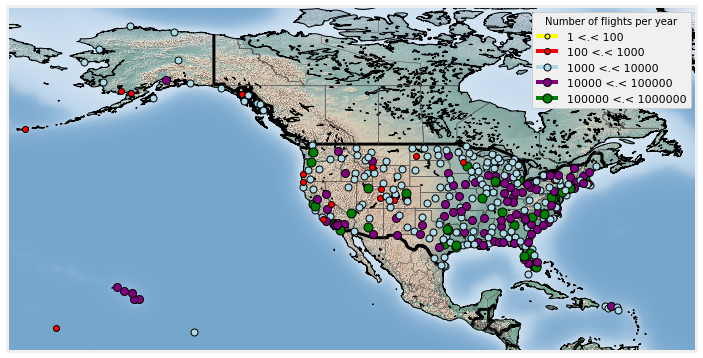

In [0]:
count_flights = df['ORIGIN_AIRPORT'].value_counts()
#___________________________
plt.figure(figsize=(11,11))
#________________________________________
# define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])
#_____________________________________________
# remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
plt.show()

# DATA CLEANING 

Convert date from four different features to datetime feature for easy processing.

Merge timestamp along with Date columns in Schedued Arrival and Departure of flights.

In [0]:
df = df[df['MONTH'] == 1]

In [0]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [0]:
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [0]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

SCHEDULED_DEPARTURE SCHEDULED_ARRIVAL DEPARTURE_TIME ARRIVAL_TIME  \
0 2018-01-27 06:15:00          08:08:00       06:02:00     07:56:00   
1 2018-01-27 06:18:00          08:31:00       06:14:00     08:13:00   
2 2018-01-27 08:30:00          11:07:00       08:28:00     11:08:00   
3 2018-01-27 06:50:00          12:50:00       06:41:00     12:42:00   
4 2018-01-27 18:24:00          20:45:00       18:10:00     20:21:00   
5 2018-01-27 14:20:00          16:18:00       14:13:00     15:59:00   

   DEPARTURE_DELAY  ARRIVAL_DELAY  
0            -13.0          -12.0  
1             -4.0          -18.0  
2             -2.0            1.0  
3             -9.0           -8.0  
4            -14.0          -24.0  
5             -7.0          -19.0

In [0]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]


AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      UA            FLL                 IAH 2018-01-27 06:15:00   
1      UA            SEA                 SFO 2018-01-27 06:18:00   
2      UA            DCA                 IAH 2018-01-27 08:30:00   
3      UA            LAX                 ORD 2018-01-27 06:50:00   
4      UA            JAX                 EWR 2018-01-27 18:24:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       06:02:00            -13.0          08:08:00     07:56:00   
1       06:14:00             -4.0          08:31:00     08:13:00   
2       08:28:00             -2.0          11:07:00     11:08:00   
3       06:41:00             -9.0          12:50:00     12:42:00   
4       18:10:00            -14.0          20:45:00     20:21:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  
0          -12.0           173.0         174.0  
1          -18.0           133.0         119.0  
2            1.0           217.0         220.0  
3           -8.0           240.0         241.0  
4          -24.0           141.0         131.0

# Depth of Data availability

Identify NaN data from the data set and identify the percentage of data which is null or empty. This analysis helps us to get awareness if data is skewed in any direction.

In [0]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0   SCHEDULED_DEPARTURE          583985           49.417419
1         ARRIVAL_DELAY           36651           96.825428
2          ELAPSED_TIME           36449           96.842925
3          ARRIVAL_TIME           34604           97.002732
4       DEPARTURE_DELAY           33686           97.082246
5        DEPARTURE_TIME           33183           97.125814
6        SCHEDULED_TIME             134           99.988393
7               AIRLINE               0          100.000000
8        ORIGIN_AIRPORT               0          100.000000
9   DESTINATION_AIRPORT               0          100.000000
10    SCHEDULED_ARRIVAL               0          100.000000

# Result of Depth Analysis
ARRIVAL_DELAY  is 97% empty. Since the percentage of data is huge for mockup or imputing, We decided to drop the column as considering this will cause heavy load to unknown feature.

In [0]:
df.dropna(inplace = True)

# Airline Data Set 

Read airline data from airlines Dataset.

Features in airine data set - 
- IATA_CODE - International Air Transport Association airport code
- AIRLINE - Airline Description

In [0]:
airlines_names = pd.read_csv('/content/drive/My Drive/AirlineDelay/airlineslatest.csv')
airlines_names

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         F9        Frontier Airlines Inc.
3         B6               JetBlue Airways
4         OO         Skywest Airlines Inc.
5         AS          Alaska Airlines Inc.
6         NK              Spirit Air Lines
7         WN        Southwest Airlines Co.
8         DL          Delta Air Lines Inc.
9         EV   Atlantic Southeast Airlines
10        HA        Hawaiian Airlines Inc.
11        MQ  American Eagle Airlines Inc.
12        VX                Virgin America
13        9E                  Endeavor Air
14        YV                   Air Shuttle
15        OH                   Blue Streak
16        YX              Midwest Airlines
17        G4                 Allegiant Air

In [0]:
airlines_names.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

# Airline Dictionary

Airline details are much needed to further process the delay from any particular airport and airlines.

It is convenient to create Data Dictionary of IATA Code and Airline description.

In [0]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

Group Delays based on Airlines

Identify Minimum, Maximum delays for each Airlines from Airline Data set.

In [0]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

min     max     count       mean
AIRLINE                                   
VX      -24.0   520.0    5715.0   2.824497
HA      -24.0  1682.0    6605.0   1.456624
G4      -34.0   680.0    6730.0  10.338187
F9      -30.0  1254.0    9549.0  15.959053
NK      -34.0  1363.0   13799.0   5.585912
AS      -50.0   483.0   15124.0  -2.351362
YV      -24.0  1489.0   15332.0   8.797221
9E      -32.0  1184.0   16411.0  12.416001
EV      -24.0  1458.0   19165.0  13.630316
OH      -31.0   861.0   20601.0  13.693801
MQ      -25.0  1291.0   21581.0   8.757796
B6      -32.0  1489.0   23330.0  20.327347
YX      -27.0  1270.0   23792.0   7.246595
UA      -25.0  1418.0   44405.0   5.835379
OO      -46.0  1443.0   60652.0  14.911281
DL      -23.0  1191.0   69600.0   9.612055
AA      -27.0  2007.0   72014.0   6.870664
WN      -49.0   558.0  107023.0   8.008260

# Plot the Delays in Chart

Dataframe represents the mean, min and max delays with each airlines. This can be plotted in pie chart to visualize the data in better format.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


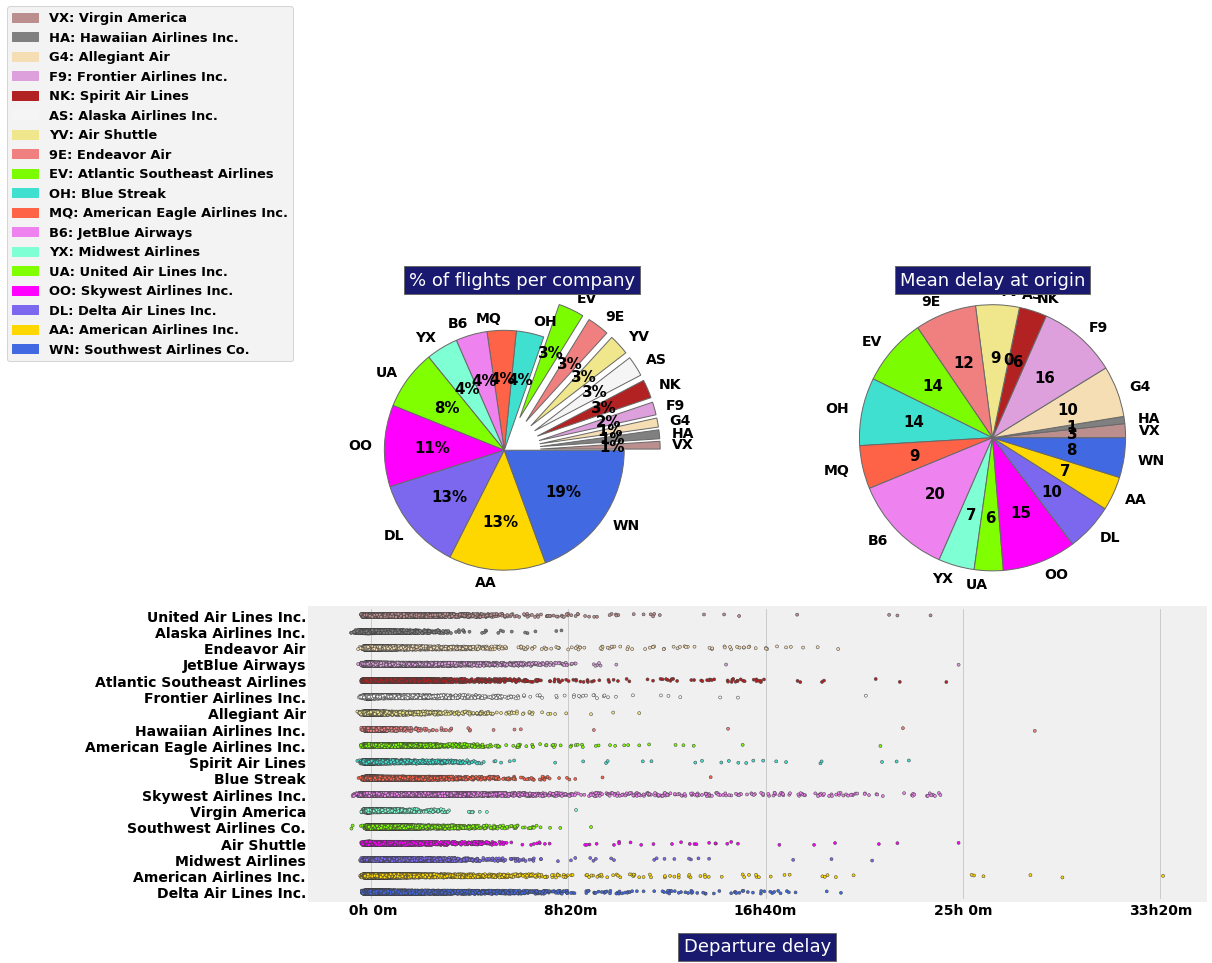

In [0]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches


df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['rosybrown', 'grey', 'wheat', 'plum', 'firebrick', 'whitesmoke', 'khaki',
          'lightcoral', 'lawngreen', 'turquoise', 'tomato', 'violet', 'aquamarine', 'chartreuse',
          'magenta', 'mediumslateblue', 'gold', 'royalblue']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

#colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
#          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 3, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 

###  How large is the delay for each airlines?

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


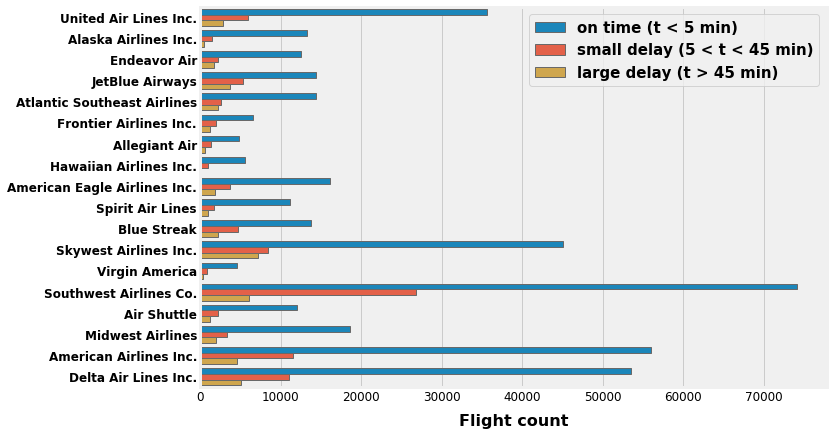

In [0]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

## Distribution of Delays among airlines 

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


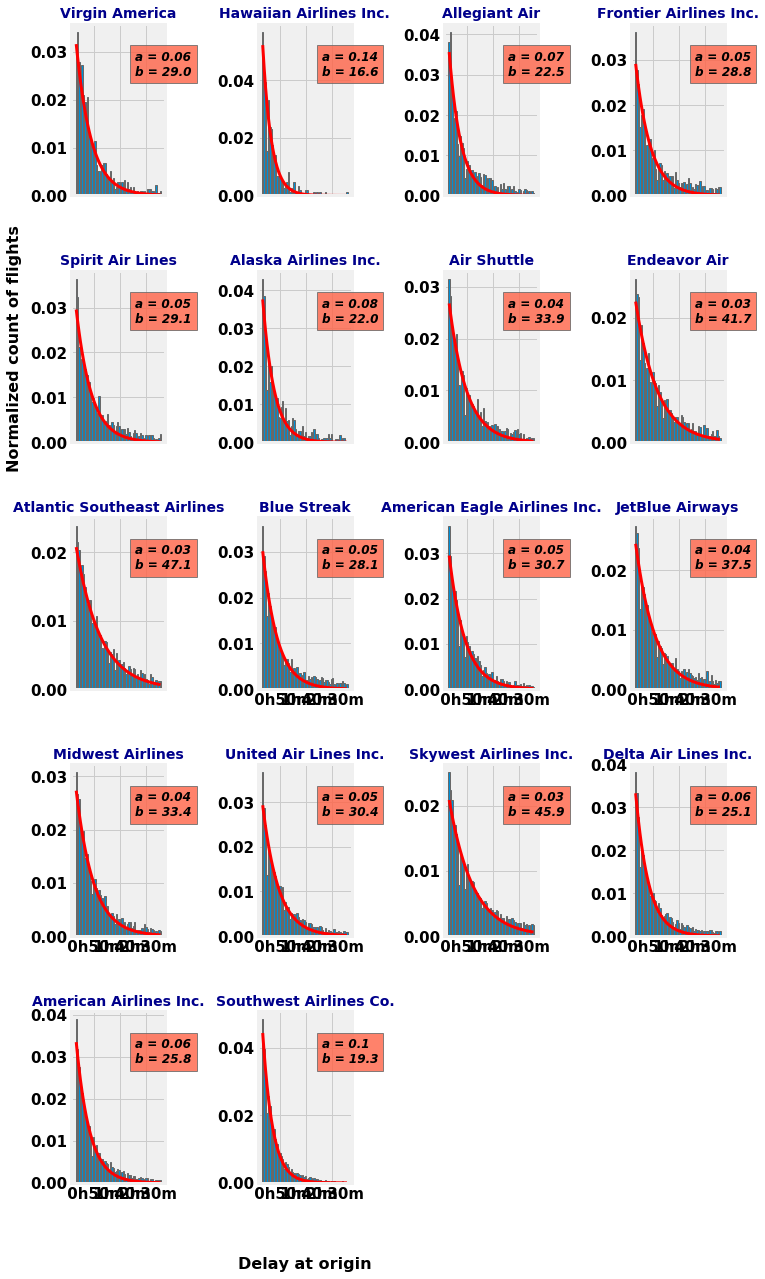

In [0]:
#___________________________________________
# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,18))
i = 0
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    #if i is 15 :break
    i += 1
    ax = fig.add_subplot(5,4,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_name]['DEPARTURE_DELAY'],
                                range = (15,180), normed=True, bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 5:
        ax.text(-0.6,-0.15,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 18:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

In [0]:

weatherData = pd.read_csv('/content/drive/My Drive/AirlineDelay/Jan18_oct19_NOAA_SFO_WeatherData.csv', low_memory=False)
print('Dataframe dimensions:', weatherData.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(weatherData.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(weatherData.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(weatherData.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info
weatherData.head()

Dataframe dimensions: (638, 22)


STATION                                        NAME  LATITUDE  \
0  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
1  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
2  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
3  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
4  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   

   LONGITUDE  ELEVATION    DATE  AWND  PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  \
0  -122.3647        2.4  1/1/18  1.79   NaN  0.00   0.0   0.0    52  58.0   
1  -122.3647        2.4  1/2/18  2.46   NaN  0.00   0.0   0.0    54  59.0   
2  -122.3647        2.4  1/3/18  2.91   NaN  0.30   0.0   0.0    55  58.0   
3  -122.3647        2.4  1/4/18  6.04   NaN  0.03   0.0   0.0    54  63.0   
4  -122.3647        2.4  1/5/18  5.59   NaN  0.19   0.0   0.0    59  64.0   

   TMIN  WDF2   WDF5  WSF2  WSF5  WT01  WT02  WT03  WT08  
0  45.0   350   40.0   6.9  10.1   1.0   NaN   NaN   1.0  
1  50.0   150  150.0   8.1  11.0   1.0   NaN   NaN   1.0  
2  51.0   150  140.0  12.1  14.1   1.0   NaN   NaN   1.0  
3  52.0   180  180.0  19.9  21.9   1.0   NaN   NaN   1.0  
4  53.0   280  270.0  19.9  21.9   1.0   NaN   NaN   1.0

In [0]:
df.head()

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      UA            FLL                 IAH 2018-01-27 06:15:00   
1      UA            SEA                 SFO 2018-01-27 06:18:00   
2      UA            DCA                 IAH 2018-01-27 08:30:00   
3      UA            LAX                 ORD 2018-01-27 06:50:00   
4      UA            JAX                 EWR 2018-01-27 18:24:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       06:02:00            -13.0          08:08:00     07:56:00   
1       06:14:00             -4.0          08:31:00     08:13:00   
2       08:28:00             -2.0          11:07:00     11:08:00   
3       06:41:00             -9.0          12:50:00     12:42:00   
4       18:10:00            -14.0          20:45:00     20:21:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL  
0          -12.0           173.0         174.0            0  
1          -18.0           133.0         119.0            0  
2            1.0           217.0         220.0            0  
3           -8.0           240.0         241.0            0  
4          -24.0           141.0         131.0            0

In [0]:
weatherData.head()

STATION                                        NAME  LATITUDE  \
0  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
1  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
2  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
3  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
4  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   

   LONGITUDE  ELEVATION    DATE  AWND  PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  \
0  -122.3647        2.4  1/1/18  1.79   NaN  0.00   0.0   0.0    52  58.0   
1  -122.3647        2.4  1/2/18  2.46   NaN  0.00   0.0   0.0    54  59.0   
2  -122.3647        2.4  1/3/18  2.91   NaN  0.30   0.0   0.0    55  58.0   
3  -122.3647        2.4  1/4/18  6.04   NaN  0.03   0.0   0.0    54  63.0   
4  -122.3647        2.4  1/5/18  5.59   NaN  0.19   0.0   0.0    59  64.0   

   TMIN  WDF2   WDF5  WSF2  WSF5  WT01  WT02  WT03  WT08  
0  45.0   350   40.0   6.9  10.1   1.0   NaN   NaN   1.0  
1  50.0   150  150.0   8.1  11.0   1.0   NaN   NaN   1.0  
2  51.0   150  140.0  12.1  14.1   1.0   NaN   NaN   1.0  
3  52.0   180  180.0  19.9  21.9   1.0   NaN   NaN   1.0  
4  53.0   280  270.0  19.9  21.9   1.0   NaN   NaN   1.0

In [0]:
sfo_airlines = df
sfo_airlines = df[df['ORIGIN_AIRPORT']=='SFO']


In [0]:
sfo_airlines['DATE'] = sfo_airlines['SCHEDULED_DEPARTURE'].dt.date
sfo_airlines.head(5)

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
11      UA            SFO                 LAS 2018-01-27 10:42:00   
52      UA            SFO                 IND 2018-01-27 12:00:00   
56      UA            SFO                 RNO 2018-01-27 22:54:00   
70      UA            SFO                 HNL 2018-01-27 13:20:00   
77      UA            SFO                 DFW 2018-01-27 10:40:00   

   DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
11       10:33:00             -9.0          12:21:00     12:08:00   
52       11:46:00            -14.0          19:13:00     18:51:00   
56       22:48:00             -6.0          23:59:00     23:41:00   
70       13:15:00             -5.0          16:59:00     17:11:00   
77       10:32:00             -8.0          16:15:00     15:53:00   

    ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL        DATE  
11          -13.0            99.0          95.0            0  2018-01-27  
52          -22.0           253.0         245.0            0  2018-01-27  
56          -18.0            65.0          53.0            0  2018-01-27  
70           12.0           339.0         356.0            0  2018-01-27  
77          -22.0           215.0         201.0            0  2018-01-27

In [0]:
sfo_airlines.isnull().sum(axis = 0)

AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
SCHEDULED_TIME         0
ELAPSED_TIME           0
DELAY_LEVEL            0
DATE                   0
dtype: int64

# Merge Weather Data

In [0]:
weatherData.columns
weatherData.DATE = pd.to_datetime(weatherData.DATE)
sfo_airlines.DATE = pd.to_datetime(sfo_airlines.DATE)

In [0]:
weatherData.dtypes
# sfo_airlines.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
AWND                float64
PGTM                float64
PRCP                float64
SNOW                float64
SNWD                float64
TAVG                  int64
TMAX                float64
TMIN                float64
WDF2                  int64
WDF5                float64
WSF2                float64
WSF5                float64
WT01                float64
WT02                float64
WT03                float64
WT08                float64
dtype: object

In [0]:
airline_weather_merged = pd.merge(sfo_airlines, weatherData, on='DATE', how='inner')

In [0]:
airline_weather_merged.head(5)

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      UA            SFO                 LAS 2018-01-27 10:42:00   
1      UA            SFO                 IND 2018-01-27 12:00:00   
2      UA            SFO                 RNO 2018-01-27 22:54:00   
3      UA            SFO                 HNL 2018-01-27 13:20:00   
4      UA            SFO                 DFW 2018-01-27 10:40:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       10:33:00             -9.0          12:21:00     12:08:00   
1       11:46:00            -14.0          19:13:00     18:51:00   
2       22:48:00             -6.0          23:59:00     23:41:00   
3       13:15:00             -5.0          16:59:00     17:11:00   
4       10:32:00             -8.0          16:15:00     15:53:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL       DATE  \
0          -13.0            99.0          95.0            0 2018-01-27   
1          -22.0           253.0         245.0            0 2018-01-27   
2          -18.0            65.0          53.0            0 2018-01-27   
3           12.0           339.0         356.0            0 2018-01-27   
4          -22.0           215.0         201.0            0 2018-01-27   

       STATION                                        NAME  LATITUDE  \
0  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
1  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
2  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
3  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
4  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   

   LONGITUDE  ELEVATION  AWND    PGTM  PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  \
0  -122.3647        2.4  4.47  1733.0   0.0   0.0   0.0    49  60.0  42.0   
1  -122.3647        2.4  4.47  1733.0   0.0   0.0   0.0    49  60.0  42.0   
2  -122.3647        2.4  4.47  1733.0   0.0   0.0   0.0    49  60.0  42.0   
3  -122.3647        2.4  4.47  1733.0   0.0   0.0   0.0    49  60.0  42.0   
4  -122.3647        2.4  4.47  1733.0   0.0   0.0   0.0    49  60.0  42.0   

   WDF2   WDF5  WSF2  WSF5  WT01  WT02  WT03  WT08  
0   290  290.0  13.0  15.0   NaN   NaN   NaN   NaN  
1   290  290.0  13.0  15.0   NaN   NaN   NaN   NaN  
2   290  290.0  13.0  15.0   NaN   NaN   NaN   NaN  
3   290  290.0  13.0  15.0   NaN   NaN   NaN   NaN  
4   290  290.0  13.0  15.0   NaN   NaN   NaN   NaN

In [0]:
airline_weather_merged.dtypes

AIRLINE                        object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME                 object
DEPARTURE_DELAY               float64
SCHEDULED_ARRIVAL              object
ARRIVAL_TIME                   object
ARRIVAL_DELAY                 float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
DELAY_LEVEL                     int64
DATE                   datetime64[ns]
STATION                        object
NAME                           object
LATITUDE                      float64
LONGITUDE                     float64
ELEVATION                     float64
AWND                          float64
PGTM                          float64
PRCP                          float64
SNOW                          float64
SNWD                          float64
TAVG                            int64
TMAX                          float64
TMIN                          float64
WDF2        

In [0]:
airline_weather_merged.rename(columns={'TAVG':'TEMP_AVG',
                          'TMAX':'TEMP_MAX',
                          'TMIN':'TEMP_MIN',
                          'TOBS': 'TEMP_AT_TIME_OF_OBSRVTN',
                          'PRCP':'PRECIPITATION',
                          'SNOW':'SNOWFALL',
                          'SNWD':'SNOW_DEPTH',
                          'WT03':'THUNDER',
                          'WT08':'SMOKE',
                          'WSF2':'WIND'
                          }, 
                 inplace=True)
 

In [0]:
airline_weather_merged.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DELAY_LEVEL', 'DATE', 'STATION', 'NAME', 'LATITUDE',
       'LONGITUDE', 'ELEVATION', 'AWND', 'PGTM', 'PRECIPITATION', 'SNOWFALL',
       'SNOW_DEPTH', 'TEMP_AVG', 'TEMP_MAX', 'TEMP_MIN', 'WDF2', 'WDF5',
       'WIND', 'WSF5', 'WT01', 'WT02', 'THUNDER', 'SMOKE'],
      dtype='object')

In [0]:
airline_weather_merged = airline_weather_merged[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DELAY_LEVEL', 'DATE', 'STATION', 'NAME', 'LATITUDE',
       'LONGITUDE', 'ELEVATION', 'PRECIPITATION', 'SNOWFALL',
        'SNOW_DEPTH',  'TEMP_AVG',
        'TEMP_MAX',  'TEMP_MIN',
        'THUNDER', 'SMOKE']]

In [0]:
airline_weather_merged

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0          UA            SFO                 LAS 2018-01-27 10:42:00   
1          UA            SFO                 IND 2018-01-27 12:00:00   
2          UA            SFO                 RNO 2018-01-27 22:54:00   
3          UA            SFO                 HNL 2018-01-27 13:20:00   
4          UA            SFO                 DFW 2018-01-27 10:40:00   
...       ...            ...                 ...                 ...   
13845      DL            SFO                 JFK 2018-01-13 06:10:00   
13846      DL            SFO                 ATL 2018-01-13 09:00:00   
13847      DL            SFO                 MSP 2018-01-13 12:40:00   
13848      DL            SFO                 BOS 2018-01-13 11:55:00   
13849      DL            SFO                 MSP 2018-01-13 00:25:00   

      DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0           10:33:00             -9.0          12:21:00     12:08:00   
1           11:46:00            -14.0          19:13:00     18:51:00   
2           22:48:00             -6.0          23:59:00     23:41:00   
3           13:15:00             -5.0          16:59:00     17:11:00   
4           10:32:00             -8.0          16:15:00     15:53:00   
...              ...              ...               ...          ...   
13845       06:06:00             -4.0          14:46:00     14:34:00   
13846       08:57:00             -3.0          16:38:00     16:23:00   
13847       12:39:00             -1.0          18:22:00     18:00:00   
13848       12:08:00             13.0          20:41:00     20:31:00   
13849       00:24:00             -1.0          06:01:00     06:04:00   

       ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL       DATE  \
0              -13.0            99.0          95.0            0 2018-01-27   
1              -22.0           253.0         245.0            0 2018-01-27   
2              -18.0            65.0          53.0            0 2018-01-27   
3               12.0           339.0         356.0            0 2018-01-27   
4              -22.0           215.0         201.0            0 2018-01-27   
...              ...             ...           ...          ...        ...   
13845          -12.0           336.0         328.0            0 2018-01-13   
13846          -15.0           278.0         266.0            0 2018-01-13   
13847          -22.0           222.0         201.0            0 2018-01-13   
13848          -10.0           346.0         323.0            1 2018-01-13   
13849            3.0           216.0         220.0            0 2018-01-13   

           STATION                                        NAME  LATITUDE  \
0      USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
1      USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
2      USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
3      USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
4      USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
...            ...                                         ...       ...   
13845  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
13846  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
13847  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
13848  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
13849  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   

       LONGITUDE  ELEVATION  PRECIPITATION  SNOWFALL  SNOW_DEPTH  TEMP_AVG  \
0      -122.3647        2.4            0.0       0.0         0.0        49   
1      -122.3647        2.4            0.0       0.0         0.0        49   
2      -122.3647        2.4            0.0       0.0         0.0        49   
3      -122.3647        2.4            0.0       0.0         0.0        49   
4      -122.3647        2.4         

# Decision Tree

Classify the data points from Airlines and Weather and catagories delays into three category less than 5mins delay, 5 to 45 mins delay and greater than 45mins delay.

Constructed a decision tree on these categories to visualize flight and airline datasets.

In [0]:
airline_weather_merged['DELAY_LEVEL'].unique()

array([0, 1, 2])

In [0]:
def mapAirlineID(airline_weather_merged):
    airline_id = airline_weather_merged['AIRLINE'].unique().tolist()
    mapping = dict( zip(airline_id,range(len(airline_id))) )
    airline_weather_merged.replace({'airline_id': mapping},inplace=True)

    airlineID = []
    for row in airline_weather_merged['AIRLINE']:
        try:
            airlineID.append(mapping[row.strip()])
        except:
            airlineID.append(np.NaN)
    airline_weather_merged['airlineID'] = airlineID

mapAirlineID(airline_weather_merged)

In [0]:
def mapOriginAirportID(airline_weather_merged):
    airline_id = airline_weather_merged['ORIGIN_AIRPORT'].unique().tolist()
    mapping = dict( zip(airline_id,range(len(airline_id))) )
    airline_weather_merged.replace({'airline_id': mapping},inplace=True)

    airlineID = []
    for row in airline_weather_merged['ORIGIN_AIRPORT']:
        try:
            airlineID.append(mapping[row.strip()])
        except:
            airlineID.append(np.NaN)
    airline_weather_merged['originAirportID'] = airlineID

mapOriginAirportID(airline_weather_merged)

In [0]:
def mapDestinationAirportID(airline_weather_merged):
    airline_id = airline_weather_merged['DESTINATION_AIRPORT'].unique().tolist()
    mapping = dict( zip(airline_id,range(len(airline_id))) )
    airline_weather_merged.replace({'airline_id': mapping},inplace=True)

    destinationAirportID = []
    for row in airline_weather_merged['DESTINATION_AIRPORT']:
        try:
            destinationAirportID.append(mapping[row.strip()])
        except:
            destinationAirportID.append(np.NaN)
    airline_weather_merged['destinationAirportID'] = destinationAirportID

mapDestinationAirportID(airline_weather_merged)

In [0]:
airline_weather_merged.head()

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      UA            SFO                 LAS 2018-01-27 10:42:00   
1      UA            SFO                 IND 2018-01-27 12:00:00   
2      UA            SFO                 RNO 2018-01-27 22:54:00   
3      UA            SFO                 HNL 2018-01-27 13:20:00   
4      UA            SFO                 DFW 2018-01-27 10:40:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       10:33:00             -9.0          12:21:00     12:08:00   
1       11:46:00            -14.0          19:13:00     18:51:00   
2       22:48:00             -6.0          23:59:00     23:41:00   
3       13:15:00             -5.0          16:59:00     17:11:00   
4       10:32:00             -8.0          16:15:00     15:53:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL       DATE  \
0          -13.0            99.0          95.0            0 2018-01-27   
1          -22.0           253.0         245.0            0 2018-01-27   
2          -18.0            65.0          53.0            0 2018-01-27   
3           12.0           339.0         356.0            0 2018-01-27   
4          -22.0           215.0         201.0            0 2018-01-27   

       STATION                                        NAME  LATITUDE  \
0  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
1  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
2  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
3  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   
4  USW00023234  SAN FRANCISCO INTERNATIONAL AIRPORT, CA US   37.6197   

   LONGITUDE  ELEVATION  PRECIPITATION  SNOWFALL  SNOW_DEPTH  TEMP_AVG  \
0  -122.3647        2.4            0.0       0.0         0.0        49   
1  -122.3647        2.4            0.0       0.0         0.0        49   
2  -122.3647        2.4            0.0       0.0         0.0        49   
3  -122.3647        2.4            0.0       0.0         0.0        49   
4  -122.3647        2.4            0.0       0.0         0.0        49   

   TEMP_MAX  TEMP_MIN  THUNDER  SMOKE  airlineID  originAirportID  \
0      60.0      42.0      NaN    NaN          0                0   
1      60.0      42.0      NaN    NaN          0                0   
2      60.0      42.0      NaN    NaN          0                0   
3      60.0      42.0      NaN    NaN          0                0   
4      60.0      42.0      NaN    NaN          0                0   

   destinationAirportID  
0                     0  
1                     1  
2                     2  
3                     3  
4                     4

In [0]:
import random
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [0]:
decisionTree_df = airline_weather_merged[[ 'DEPARTURE_DELAY',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DELAY_LEVEL',  'LATITUDE',
       'LONGITUDE', 'ELEVATION', 'PRECIPITATION', 'SNOWFALL', 'SNOW_DEPTH',
       'TEMP_AVG', 'TEMP_MAX', 'TEMP_MIN', 'THUNDER', 'SMOKE', 'airlineID',
       'originAirportID', 'destinationAirportID']]
decisionTree_df.replace(np.nan, 0, inplace=True)
airline_weather_merged.columns
decisionTree_df.head()

DEPARTURE_DELAY  ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL  \
0             -9.0          -13.0            99.0          95.0            0   
1            -14.0          -22.0           253.0         245.0            0   
2             -6.0          -18.0            65.0          53.0            0   
3             -5.0           12.0           339.0         356.0            0   
4             -8.0          -22.0           215.0         201.0            0   

   LATITUDE  LONGITUDE  ELEVATION  PRECIPITATION  SNOWFALL  SNOW_DEPTH  \
0   37.6197  -122.3647        2.4            0.0       0.0         0.0   
1   37.6197  -122.3647        2.4            0.0       0.0         0.0   
2   37.6197  -122.3647        2.4            0.0       0.0         0.0   
3   37.6197  -122.3647        2.4            0.0       0.0         0.0   
4   37.6197  -122.3647        2.4            0.0       0.0         0.0   

   TEMP_AVG  TEMP_MAX  TEMP_MIN  THUNDER  SMOKE  airlineID  originAirportID  \
0        49      60.0      42.0      0.0    0.0          0                0   
1        49      60.0      42.0      0.0    0.0          0                0   
2        49      60.0      42.0      0.0    0.0          0                0   
3        49      60.0      42.0      0.0    0.0          0                0   
4        49      60.0      42.0      0.0    0.0          0                0   

   destinationAirportID  
0                     0  
1                     1  
2                     2  
3                     3  
4                     4

In [0]:
features = decisionTree_df.loc[:, decisionTree_df.columns != 'DELAY_LEVEL']
target = decisionTree_df.loc[:, ['DELAY_LEVEL']]

In [0]:
print(len(features))
print(len(target))
random.seed(50)
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.20)

13850
13850


In [0]:
float(len(decisionTree_df[decisionTree_df.DELAY_LEVEL==0]))/len(decisionTree_df)

0.7576173285198556

In [0]:
# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# predict the value of restaurant rating 
y_pred = clf.predict(X_test)

# ratio of correctly predicted observation to the total observations
# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test,y_pred))

1.0


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2097
           1       1.00      1.00      1.00       459
           2       1.00      1.00      1.00       214

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00      2770
weighted avg       1.00      1.00      1.00      2770



No handles with labels found to put in legend.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Accuracy =  1.0


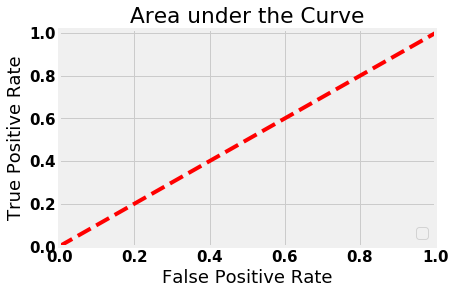

In [0]:
import matplotlib.pyplot as plt

# Graphical representaion of AUC 
print("Accuracy = ", accuracy_score(y_test, y_pred))
plt.title('Area under the Curve')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score

# predict the value of restaurant rating 
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([1])

In [0]:
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                     out_file = "ratingDRTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [0]:
!dot -Tpng ratingDRTree.dot -o ratingDRTree.png

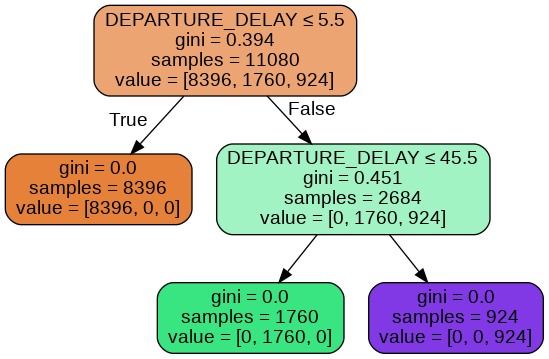

In [0]:
from IPython.display import Image
PATH = !pwd
Image(filename = PATH[0] + "/ratingDRTree.png")

# Logistic Regression


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [0]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)

  return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, y_pred)

1.0

In [0]:
from sklearn import metrics
lr=LogisticRegression().fit(X_train,y_train)
# predict the value of restaurant rating 
y_pred = lr.predict(X_test)

# ratio of correctly predicted observation to the total observations
# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test,y_pred))
multiclass_roc_auc_score(y_test, y_pred)
# fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
# lr_auc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9978339350180505


0.9974301144557979

No handles with labels found to put in legend.


Accuracy =  0.9978339350180505


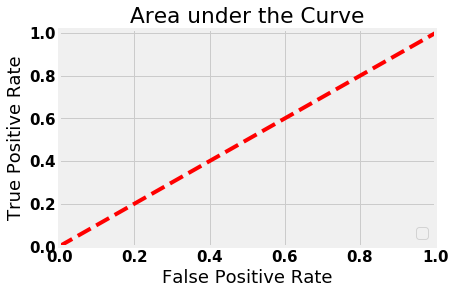

In [0]:
import matplotlib.pyplot as plt

# Graphical representaion of AUC 
print("Accuracy = ", accuracy_score(y_test, y_pred))
plt.title('Area under the Curve')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
cm=confusion_matrix(y_test,lr.predict(X_test))
prec=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
f=2*prec*recall/(prec+recall)
print ('FP Rate:{}'.format(cm[0][1]/(cm[0][1]+cm[0][0])))
print ('Precision:{}'.format(prec))
print ('Recall:{}'.format(recall))
print ('FN rate:{}'.format(cm[1][0]/(cm[1][0]+cm[0][0])))
print ('Accuracy:{}'.format(lr.score(X_test,y_test)))
print ('F-Score:{}'.format(f))

FP Rate:0.0
Precision:1.0
Recall:1.0
FN rate:0.0
Accuracy:0.9978339350180505
F-Score:1.0


# SouthWest Airline delay from All Airports

In [0]:
def get_merged_delays(df, carrier):
    liste_airports = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'heure_depart_min', 'mean']
    for id_airport in liste_airports:
        test2 = get_flight_delays(df, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[liste_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [0]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    #__________________________________
    # Conversion: date + heure -> heure
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart'].apply(fct)
    return test2

In [0]:
carrier = 'WN'
merged_df = get_merged_delays(df, carrier)
merged_df.shape

(8801, 3)

In [0]:
merged_df

AIRPORT_ID  heure_depart_min       mean
0           ABQ             18900   0.000000
1           ABQ             20400  -3.250000
2           ABQ             21300  -4.000000
3           ABQ             21600  -3.222222
4           ABQ             21900  -2.800000
...         ...               ...        ...
8796        TUS             64800  12.000000
8797        TUS             67500   7.666667
8798        TUS             69000   9.611111
8799        TUS             70500  -8.500000
8800        TUS             71100  -7.000000

[8801 rows x 3 columns]

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]

[(0, 'ABQ'), (1, 'ALB'), (2, 'AMA'), (3, 'ATL'), (4, 'AUS')]

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['heure_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(8801, 87) (8801, 1)


In [0]:
# from sklearn import metrics
# lr=LogisticRegression().fit(X_train,y_train)
# # predict the value of restaurant rating 
# y_pred = lr.predict(X_test)

# # ratio of correctly predicted observation to the total observations
# # Accuracy = TP+TN/TP+FP+FN+TN
# print(accuracy_score(y_test,y_pred))
# multiclass_roc_auc_score(y_test, y_pred)

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)

print("R2 Score =", metrics.r2_score(predictions, Y))
print("MSE =", metrics.mean_squared_error(predictions, Y))

R2 Score = -4.088335933045475
MSE = 63.23305031492595


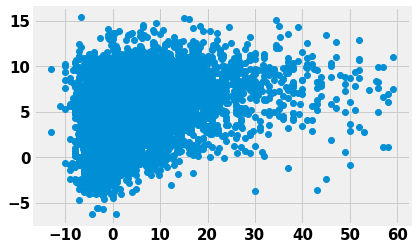

In [0]:
plt.scatter(Y,predictions)

In [0]:
df.head(5)

AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  \
0      UA            FLL                 IAH 2018-01-27 06:15:00   
1      UA            SEA                 SFO 2018-01-27 06:18:00   
2      UA            DCA                 IAH 2018-01-27 08:30:00   
3      UA            LAX                 ORD 2018-01-27 06:50:00   
4      UA            JAX                 EWR 2018-01-27 18:24:00   

  DEPARTURE_TIME  DEPARTURE_DELAY SCHEDULED_ARRIVAL ARRIVAL_TIME  \
0       06:02:00            -13.0          08:08:00     07:56:00   
1       06:14:00             -4.0          08:31:00     08:13:00   
2       08:28:00             -2.0          11:07:00     11:08:00   
3       06:41:00             -9.0          12:50:00     12:42:00   
4       18:10:00            -14.0          20:45:00     20:21:00   

   ARRIVAL_DELAY  SCHEDULED_TIME  ELAPSED_TIME  DELAY_LEVEL  
0          -12.0           173.0         174.0            0  
1          -18.0           133.0         119.0            0  
2            1.0           217.0         220.0            0  
3           -8.0           240.0         241.0            0  
4          -24.0           141.0         131.0            0

In [0]:
label_company = []
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
  label_company.append(carrier_name)

print(len(label_company))
print(len(abbr_companies))
for i in range(len(abbr_companies)):
    print(i, label_company[i])
print(len(points))

18
18
0 Virgin America
1 Hawaiian Airlines Inc.
2 Allegiant Air
3 Frontier Airlines Inc.
4 Spirit Air Lines
5 Alaska Airlines Inc.
6 Air Shuttle
7 Endeavor Air
8 Atlantic Southeast Airlines
9 Blue Streak
10 American Eagle Airlines Inc.
11 JetBlue Airways
12 Midwest Airlines
13 United Air Lines Inc.
14 Skywest Airlines Inc.
15 Delta Air Lines Inc.
16 American Airlines Inc.
17 Southwest Airlines Co.
18


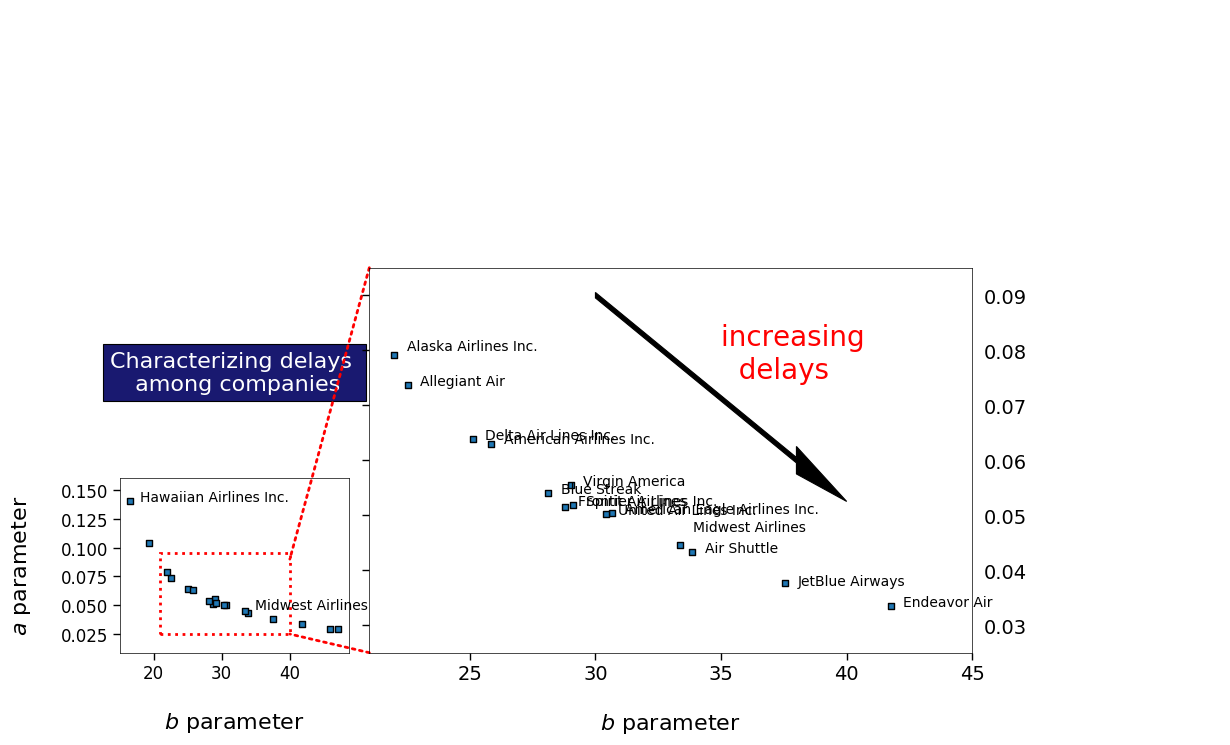

In [0]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_context('paper')
import matplotlib.patches as patches

fig = plt.figure(1, figsize=(11,5))
y_shift = [0 for _ in range(20)]
y_shift[3] = 0.5/1000
y_shift[12] = 2.5/1000
y_shift[11] = -0.5/1000
y_shift[8] = -2.5/1000
y_shift[5] = 1/1000
x_val = [s[1] for s in points]
y_val = [s[0] for s in points]


gs=GridSpec(2,7)
#_______________________________
# 1/ Plot overview (left panel)
ax1=fig.add_subplot(gs[1,0:2]) 
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
#__________________________________
# Company label: Hawaiian airlines
i= 1
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#__________________________________
# Company label: Hawaiian airlines
i= 12
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#____________
# Main Title
ax1.text(.5,1.5,'Characterizing delays \n among companies', fontsize=16,
        bbox={'facecolor':'midnightblue', 'pad':5}, color='w',
        horizontalalignment='center',
        transform=ax1.transAxes)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax1.spines[k].set_visible(True)
    ax1.spines[k].set_linewidth(0.5)
    ax1.spines[k].set_color('k')
#____________________
# Create a Rectangle 
rect = patches.Rectangle((21,0.025), 19, 0.07, linewidth=2,
                         edgecolor='r', linestyle=':', facecolor='none')
ax1.add_patch(rect)
#_______________________________________________
# 2/ Zoom on the bulk of carriers (right panel)
ax2=fig.add_subplot(gs[0:2,2:])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
ax2.set_xlim(21,45)
ax2.set_ylim(0.025,0.095)
#________________
# Company labels
for i in range(len(abbr_companies)):
    ax2.annotate(label_company[i], xy=(x_val[i]+0.5, y_val[i]+y_shift[i]),
                 xycoords='data', fontsize = 10)
#____________________________
# Increasing delay direction
ax2.arrow(30, 0.09, 8, -0.03, head_width=0.005,
          shape = 'full', head_length=2, fc='k', ec='k')
ax2.annotate('increasing \n  delays', fontsize= 20, color = 'r',
          xy=(35, 0.075), xycoords='data')
#________________________________
# position and size of the ticks
plt.tick_params(labelleft=False, labelright=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax2.spines[k].set_visible(True)
    ax2.spines[k].set_linewidth(0.5)
    ax2.spines[k].set_color('k')    
#________________________________
# Connection between the 2 plots
xy2 = (40, 0.09) ; xy1 = (21, 0.095)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
xy2 = (40, 0.025) ; xy1 = (21, 0.025)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
#--------------------------------
plt.show()

# Delays: Take-off or Landing ?

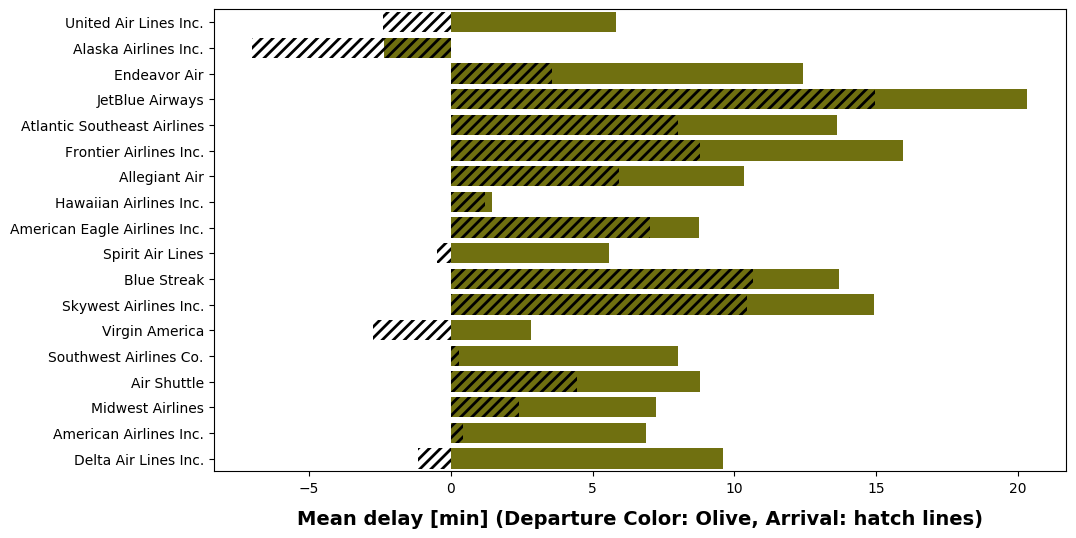

In [0]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="olive", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (Departure Color: Olive, Arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

# Relation between the origin airport and delays

In [0]:
print("Nb of airports: {}".format(len(df['ORIGIN_AIRPORT'].unique())))


Nb of airports: 339


In [0]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

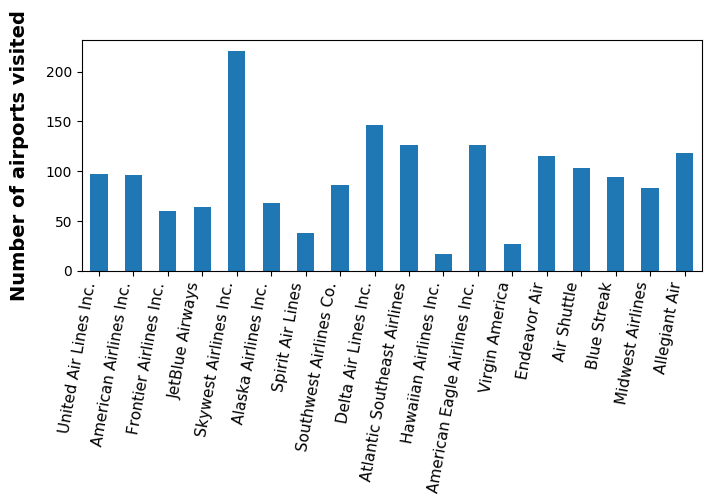

In [0]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [0]:
temp = pd.read_csv('/content/drive/My Drive/AirlineDelay/airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [0]:
def make_map(df, carrier, long_min, long_max, lat_min, lat_max):
    fig=plt.figure(figsize=(7,3))
    ax=fig.add_axes([0.,0.,1.,1.])
    m = Basemap(resolution='i',llcrnrlon=long_min, urcrnrlon=long_max,
                  llcrnrlat=lat_min, urcrnrlat=lat_max, lat_0=0, lon_0=0,)
    df2 = df[df['AIRLINE'] == carrier]
    count_trajectories = df2.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size()
    count_trajectories.sort_values(inplace = True)
    
    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        m.plot(nylon, nylat, marker='o', markersize = 10, markeredgewidth = 1,
                   color = 'seagreen', markeredgecolor='k')

    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        lonlat, lonlon = latitude_airport[dest], longitude_airport[dest]
        if pd.isnull(nylat) or pd.isnull(nylon) or \
                pd.isnull(lonlat) or pd.isnull(lonlon): continue
        if s < 100:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=0.5, color='b',
                             label = '< 100')
        elif s < 200:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='r',
                             label = '100 <.< 200')
        else:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='gold',
                              label = '> 200')    
    #_____________________________________________
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    key_order = ('< 100', '100 <.< 200', '> 200')                
    new_label = OrderedDict()
    for key in key_order:
        if key not in by_label.keys(): continue
        new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':8},
               title='flights per month', facecolor = 'palegreen', 
               shadow = True, frameon = True, framealpha = 1)    
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title('{} flights'.format(abbr_companies[carrier]))

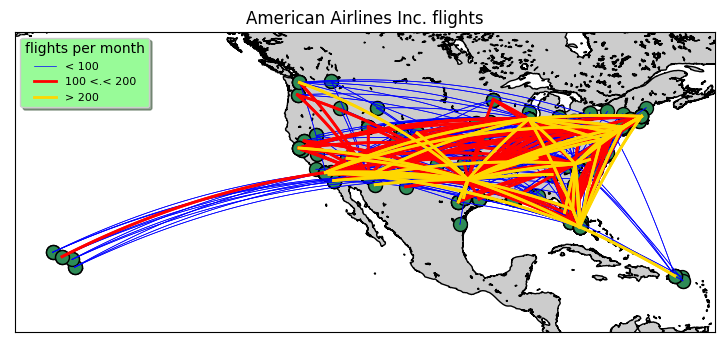

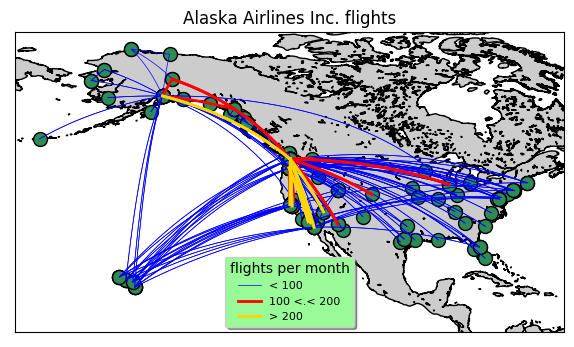

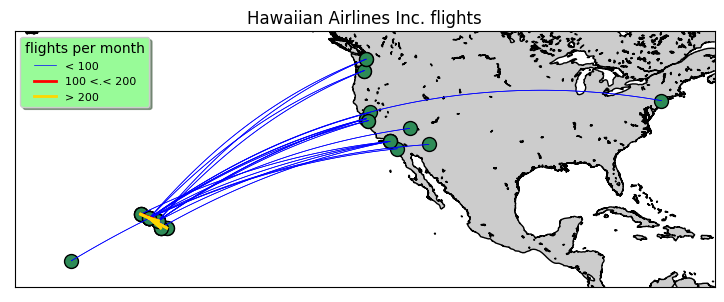

In [0]:
coord = dict()
coord['AA'] = [-165, -60, 10, 55]
coord['AS'] = [-182, -63, 10, 75]
coord['HA'] = [-180, -65, 10, 52]
for carrier in ['AA', 'AS', 'HA']: 
    make_map(df, carrier, *coord[carrier])

In [0]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

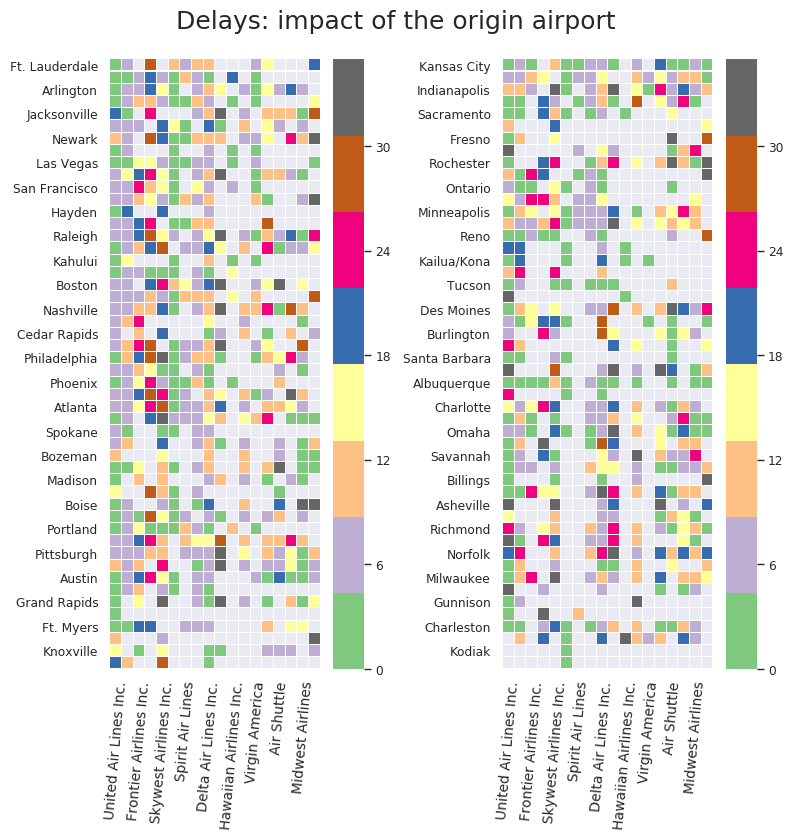

In [0]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [0]:
#_________________________________________________________________
# We select the company and create a subset of the main dataframe
carrier = 'AA'
df1 = df[df['AIRLINE']==carrier][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
#___________________________________________________________
# I collect the routes and list the delays for each of them
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DEPARTURE_DELAY']): continue
    route = str(col['ORIGIN_AIRPORT'])+'-'+str(col['DESTINATION_AIRPORT'])
    if route in trajet.keys():
        trajet[route].append(col['DEPARTURE_DELAY'])
    else:
        trajet[route] = [col['DEPARTURE_DELAY']]
#____________________________________________________________________        
# I transpose the dictionary in a list to sort the routes by origins        
liste_trajet = []
for key, value in trajet.items():
    liste_trajet.append([key, value])
liste_trajet.sort()

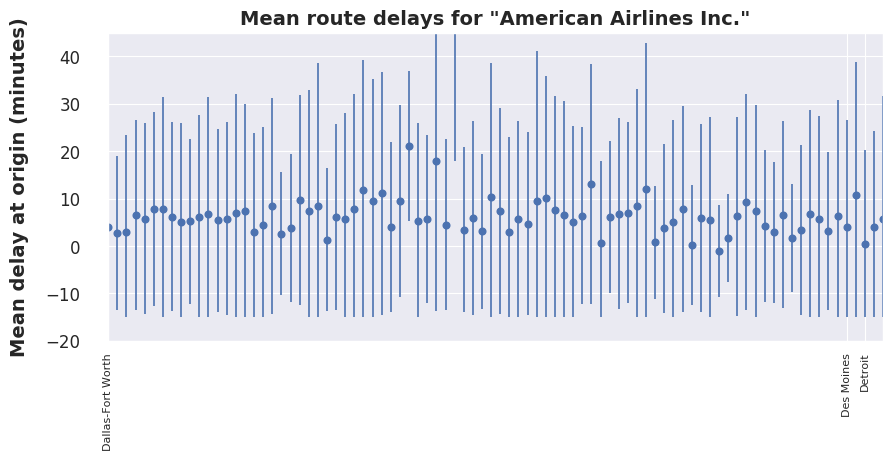

In [0]:
mean_val = [] ; std_val = [] ; x_label = []

i = 0
for route, liste_retards in liste_trajet:
    #_____________________________________________
    # I set the labels as the airport from origin
    index = route.split('-')[0]
    x_label.append(identify_airport[index])
    #______________________________________________________________________________
    # I put a threshold on delays to prevent that high values take too much weight
    trajet2 = [min(90, s) for s in liste_retards]
    #________________________________________
    # I compute mean and standard deviations
    mean_val.append(scipy.mean(trajet2))
    std_val.append(scipy.std(trajet2))
    i += 1
#________________
# Plot the graph
fig, ax = plt.subplots(figsize=(10,4))
std_min = [ min(15 + mean_val[i], s) for i,s in enumerate(std_val)] 
ax.errorbar(list(range(i)), mean_val, yerr = [std_min, std_val], fmt='o') 
ax.set_title('Mean route delays for "{}"'.format(abbr_companies[carrier]),
             fontsize=14, weight = 'bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight = 'bold', labelpad=12)
#___________________________________________________
# I define the x,y range and positions of the ticks
imin, imax = 145, 230
plt.xlim(imin, imax) ; plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin+1,imax):
    if x_label[j] == x_label[j-1]: continue
    liste_ticks.append(j)
#_____________________________
# and set the tick parameters  
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation = 90, fontsize = 8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

In [0]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])  

In [0]:
carrier = 'WN'
id_airport = 4
liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
df2 = df[(df['AIRLINE'] == carrier) & (df['ARRIVAL_DELAY'] > 0)
         & (df['ORIGIN_AIRPORT'] == liste_origin_airport[id_airport])]
df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)

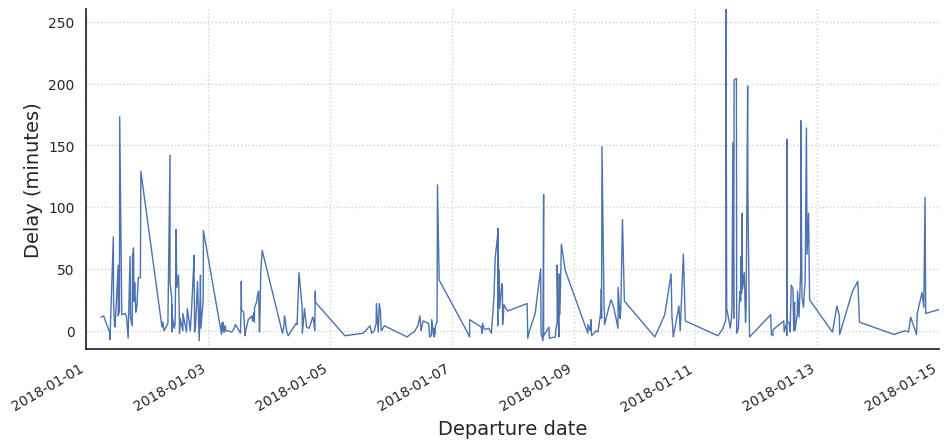

In [0]:
fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(df2['SCHEDULED_DEPARTURE'], df2['DEPARTURE_DELAY'], linestyle='-')
fig1.style() 
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure date', fontsize = 14)
date_1 = datetime.datetime(2018,1,1)
date_2 = datetime.datetime(2018,1,15)
fig1.set_xlim(date_1, date_2)
fig1.set_ylim(-15, 260)

In [0]:
#_______________________________
def func2(x, a, b, c):
    return a * x**2 +  b*x + c
#_______________________________
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
fct = lambda x:x.hour*3600+x.minute*60+x.second
x_val = np.array([fct(s) for s in test2.index]) 
y_val = test2['mean']
popt, pcov = curve_fit(func2, x_val, y_val, p0 = [1, 2, 3])
test2['fit'] = pd.Series(func2(x_val, *popt), index = test2.index)

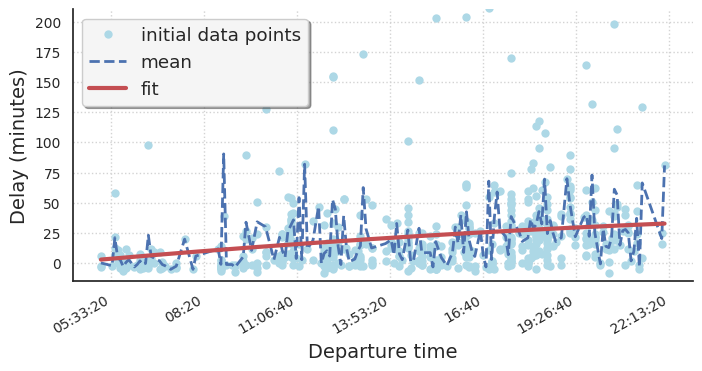

In [0]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot_date(df2['heure_depart'], df2['DEPARTURE_DELAY'],
                    markeredge=False, label='initial data points')
fig1.cust_plot(test2.index, test2['mean'], linestyle='--', linewidth=2, label='mean')
fig1.cust_plot(test2.index, test2['fit'], color='r', linestyle='-', linewidth=3, label='fit')
fig1.style() ; fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
fig1.set_ylim(-15, 210)

In [0]:
df_train = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2018, 1, 23)]
df_test  = df[df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2018, 1, 23)]
df = df_train

In [0]:
carrier = 'AA'
check_airports = df[(df['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

min    max  count       mean
ORIGIN_AIRPORT                               
MTJ            -19.0  136.0   28.0  17.607143
ICT            -12.0  322.0   21.0  17.476190
LBB            -15.0  139.0    8.0  18.750000
SBA             -9.0    4.0    7.0  -2.857143
AMA            -11.0   -1.0    2.0  -6.000000

In [0]:
def linear_regression(test2):
    test = test2[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['heure_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result

In [0]:
id_airport = 'PHL'
df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['heure_depart'] = df2['heure_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
#___________________
# first case
test2 = get_flight_delays(df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
#___________________
# second case
test3 = get_flight_delays(df, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

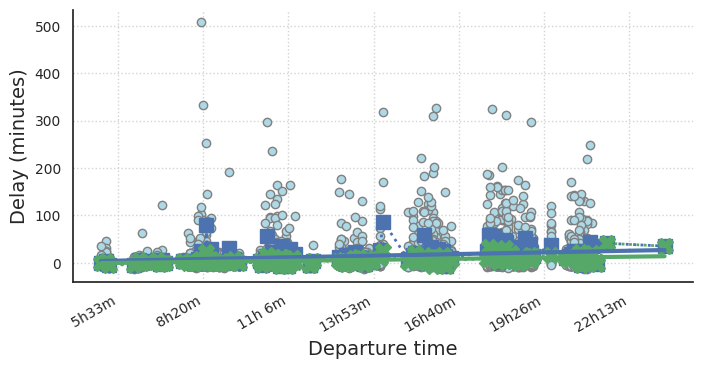

In [0]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_scatter(df2['heure_depart'], df2['DEPARTURE_DELAY'], markeredge = True)
fig1.cust_plot(X1, Y1, color = 'b', linestyle = ':', linewidth = 2, marker = ('b','s', 10))
fig1.cust_plot(X2, Y2, color = 'g', linestyle = ':', linewidth = 2, marker = ('g','X', 12))
fig1.cust_plot(X1, result2, color = 'b', linewidth = 3)
fig1.cust_plot(X2, result3, color = 'g', linewidth = 3)
fig1.style()
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [0]:
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

modèle nº1 , min. pour n = 3, score = 46.1
modèle nº2 , min. pour n = 3, score = 14.0
modèle nº3 , min. pour n = 1, score = 23.8
modèle nº4 , min. pour n = 1, score = 45.3
modèle nº5 , min. pour n = 1, score = 13.6
modèle nº6 , min. pour n = 3, score = 50.7
modèle nº7 , min. pour n = 1, score = 22.8
modèle nº8 , min. pour n = 3, score = 12.3
modèle nº9 , min. pour n = 1, score = 27.3
modèle nº10, min. pour n = 3, score = 23.2
modèle nº11, min. pour n = 3, score = 24.0
modèle nº12, min. pour n = 3, score = 50.6
modèle nº13, min. pour n = 3, score = 22.1
modèle nº14, min. pour n = 2, score = 23.3


findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.


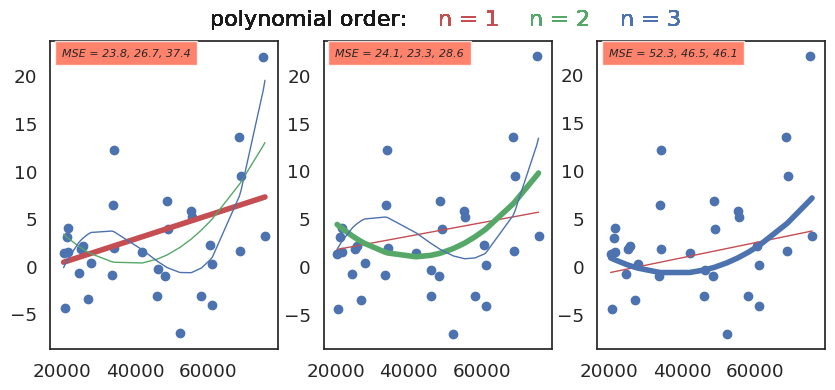

In [0]:
fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 'BNA'
test2 = get_flight_delays(df, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("modèle nº{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

In [0]:
class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = None))

In [0]:
#id_airport = 1129804 
nb_folds = 10
print('Max possible number of folds: {} \n'.format(test2.shape[0]-1))
fit2 = fit_polynome_cv(test2)
for i in range(1, 8):
    fit2.calc_score(i, nb_folds)
    print('n={} -> MSE = {}'.format(i, round(abs(fit2.score),3)))

Max possible number of folds: 31 

n=1 -> MSE = 1.755
n=2 -> MSE = 1.333
n=3 -> MSE = 1.737
n=4 -> MSE = 1.452
n=5 -> MSE = 1.417
n=6 -> MSE = 1.55
n=7 -> MSE = 1.801


In [0]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 2)
fit.predict(fit.X)

In [0]:
fit2.train(pol_order = 2, nb_folds = nb_folds)

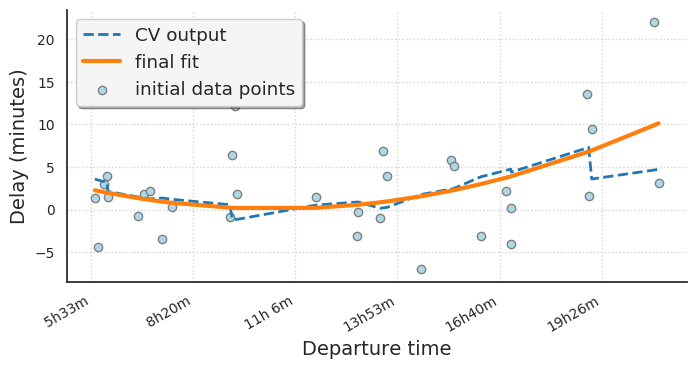

In [0]:
fig1 = Figure_style(8, 4, 1, 1) ; fig1.pos_update(0, 0)
fig1.cust_scatter(fit2.X, fit2.Y, markeredge = True, label = 'initial data points')
fig1.cust_plot(fit.X,fit2.result,color=u'#1f77b4',linestyle='--',linewidth=2,label='CV output')
fig1.cust_plot(fit.X,fit.result,color=u'#ff7f0e',linewidth = 3,label='final fit')
fig1.style(); fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)') ; fig1.set_xlabel('Departure time')
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [0]:
score = metrics.mean_squared_error(fit.result, fit2.Y)
score

25.383638099703624

In [0]:
test_data = get_flight_delays(df_test, carrier, id_airport, True)
test_data = test_data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
X_test = np.array(test_data['heure_depart_min'])
Y_test = np.array(test_data['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)
fit.predict(X_test)

In [0]:
score = metrics.mean_squared_error(fit.result, Y_test)
score

53.59532083512157

In [0]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 7.32 min'

In [0]:
def get_merged_delays(df, carrier):
    liste_airports = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    i = 0
    liste_columns = ['AIRPORT_ID', 'heure_depart_min', 'mean']
    for id_airport in liste_airports:
        test2 = get_flight_delays(df, carrier, id_airport, True)
        test2.loc[:, 'AIRPORT_ID'] = id_airport
        test2 = test2[liste_columns]
        test2.dropna(how = 'any', inplace = True)
        if i == 0:
            merged_df = test2.copy()
        else:
            merged_df = pd.concat([merged_df, test2], ignore_index = True)
        i += 1    
    return merged_df

In [0]:
carrier = 'AA'
merged_df = get_merged_delays(df, carrier)
merged_df.shape

(3097, 3)

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['AIRPORT_ID'])
#__________________________________________________________
# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['AIRPORT_ID'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
label_airports[:5]


[(0, 'ABQ'), (1, 'ALB'), (2, 'AMA'), (3, 'ATL'), (4, 'AUS')]

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
b = np.array(merged_df['heure_depart_min'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
Y = np.array(merged_df['mean'])
Y = Y.reshape(len(Y), 1)
print(X.shape, Y.shape)

(3097, 97) (3097, 1)


In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 42.20669284187206


In [0]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'3.04%'

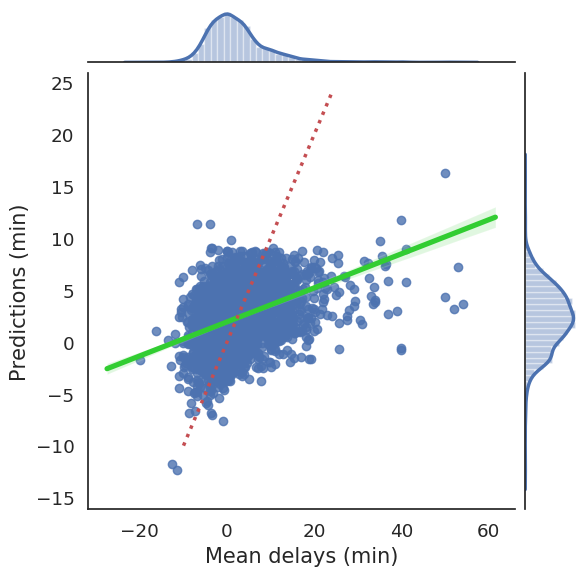

In [0]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()

In [0]:

poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
  result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, Y))

MSE = 39.43924568172764


In [0]:
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

'2.87%'

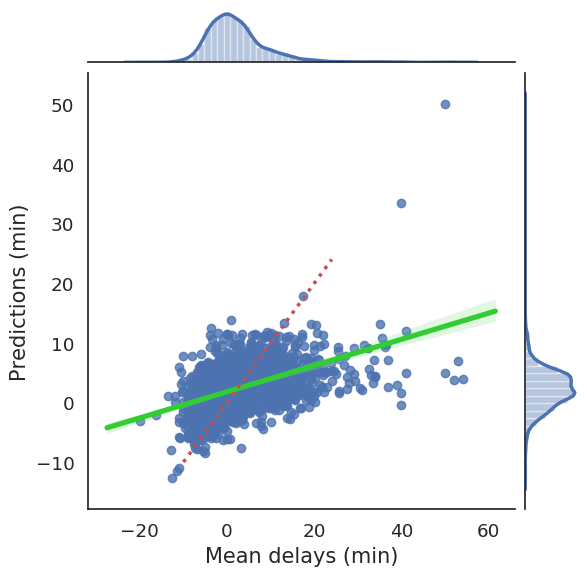

In [0]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in result]) 
tips["original_data"] = pd.Series([float(s) for s in Y]) 
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()

In [0]:
backupdf.shape
backupdf.columns

Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
       'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED',
       'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',
       'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON', 'YEAR'],
      dtype='object')

In [0]:
sfoorigindf = backupdf.loc[(backupdf['ORIGIN_AIRPORT'] == 'SFO') & (backupdf['YEAR'] == 2018)]
sfoorigindf = sfoorigindf.reset_index()
sfoorigindf.sort_index(axis=1, inplace=True)
sfoorigindf.drop(columns=['index'], inplace=True)
print('SFO Origin DF Shape', sfoorigindf.shape)
sfoorigindf.head()

SFO Origin DF Shape (190010, 31)


AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            NaN               NaN      62.0          -13.0   
1      UA            NaN               NaN     221.0          -22.0   
2      UA            NaN               NaN      32.0          -18.0   
3      UA            NaN               NaN     331.0           12.0   
4      UA            NaN               NaN     179.0          -22.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0        1208.0                 NaN        0.0   27            6   
1        1851.0                 NaN        0.0   27            6   
2        2341.0                 NaN        0.0   27            6   
3        1711.0                 NaN        0.0   27            6   
4        1553.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0             -9.0          1033.0                 LAS     414.0       0.0   
1            -14.0          1146.0                 IND    1943.0       0.0   
2             -6.0          2248.0                 RNO     192.0       0.0   
3             -5.0          1315.0                 HNL    2398.0       0.0   
4             -8.0          1032.0                 DFW    1464.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0          95.0            358                  NaN      1            SFO   
1         245.0            317                  NaN      1            SFO   
2          53.0            313                  NaN      1            SFO   
3         356.0            300                  NaN      1            SFO   
4         201.0            294                  NaN      1            SFO   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0               1221                 1042            99.0             NaN   
1               1913                 1200           253.0             NaN   
2               2359                 2254            65.0             NaN   
3               1659                 1320           339.0             NaN   
4               1615                 1040           215.0             NaN   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
0      N36469      7.0      26.0            NaN      1059.0     1201.0  2018  
1      N38268      6.0      18.0            NaN      1204.0     1845.0  2018  
2      N14214      5.0      16.0            NaN      2304.0     2336.0  2018  
3      N768UA      4.0      21.0            NaN      1336.0     1707.0  2018  
4      N834UA      6.0      16.0            NaN      1048.0     1547.0  2018

In [0]:
sfodestdf = backupdf.loc[(backupdf['DESTINATION_AIRPORT'] == 'SFO') & (backupdf['YEAR'] == 2018)]
sfodestdf = sfodestdf.reset_index()
sfodestdf.sort_index(axis=1, inplace=True)
sfodestdf.drop(columns=['index'], inplace=True)
print('SFO Destination DF Shape', sfodestdf.shape)
sfodestdf.head()

SFO Destination DF Shape (190286, 31)


AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            NaN               NaN      98.0          -18.0   
1      UA            NaN               NaN      68.0          -22.0   
2      UA            NaN               NaN     332.0          -31.0   
3      UA            NaN               NaN     363.0          -28.0   
4      UA            NaN               NaN     248.0           -5.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0         813.0                 NaN        0.0   27            6   
1        1641.0                 NaN        0.0   27            6   
2        2016.0                 NaN        0.0   27            6   
3        1227.0                 NaN        0.0   27            6   
4        1504.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0             -4.0           614.0                 SFO     679.0       0.0   
1             -5.0          1515.0                 SFO     414.0       0.0   
2             -8.0          1727.0                 SFO    2419.0       0.0   
3             -3.0           907.0                 SFO    2704.0       0.0   
4             -3.0          1222.0                 SFO    1846.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0         119.0            368                  NaN      1            SEA   
1          86.0            361                  NaN      1            LAS   
2         349.0            340                  NaN      1            IAD   
3         380.0            319                  NaN      1            BOS   
4         282.0            312                  NaN      1            ORD   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0                831                  618           133.0             NaN   
1               1703                 1520           103.0             NaN   
2               2047                 1735           372.0             NaN   
3               1255                  910           405.0             NaN   
4               1509                 1225           284.0             NaN   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
0      N477UA      5.0      16.0            NaN       630.0      808.0  2018  
1      N37255      7.0      11.0            NaN      1526.0     1634.0  2018  
2      N69810      3.0      14.0            NaN      1741.0     2013.0  2018  
3      N19141      4.0      13.0            NaN       920.0     1223.0  2018  
4      N39461      4.0      30.0            NaN      1252.0     1500.0  2018

In [0]:
sfoorigindf['DEPARTURE_DELAY_15'] = np.where(sfoorigindf['DEPARTURE_DELAY'] >= 15, 1, 0)
sfoorigindf['ARRIVAL_DELAY_15'] = np.where(sfoorigindf['ARRIVAL_DELAY'] >= 15, 1, 0)
sfoorigindf.head()

AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            NaN               NaN      62.0          -13.0   
1      UA            NaN               NaN     221.0          -22.0   
2      UA            NaN               NaN      32.0          -18.0   
3      UA            NaN               NaN     331.0           12.0   
4      UA            NaN               NaN     179.0          -22.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0        1208.0                 NaN        0.0   27            6   
1        1851.0                 NaN        0.0   27            6   
2        2341.0                 NaN        0.0   27            6   
3        1711.0                 NaN        0.0   27            6   
4        1553.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0             -9.0          1033.0                 LAS     414.0       0.0   
1            -14.0          1146.0                 IND    1943.0       0.0   
2             -6.0          2248.0                 RNO     192.0       0.0   
3             -5.0          1315.0                 HNL    2398.0       0.0   
4             -8.0          1032.0                 DFW    1464.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0          95.0            358                  NaN      1            SFO   
1         245.0            317                  NaN      1            SFO   
2          53.0            313                  NaN      1            SFO   
3         356.0            300                  NaN      1            SFO   
4         201.0            294                  NaN      1            SFO   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0               1221                 1042            99.0             NaN   
1               1913                 1200           253.0             NaN   
2               2359                 2254            65.0             NaN   
3               1659                 1320           339.0             NaN   
4               1615                 1040           215.0             NaN   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  \
0      N36469      7.0      26.0            NaN      1059.0     1201.0  2018   
1      N38268      6.0      18.0            NaN      1204.0     1845.0  2018   
2      N14214      5.0      16.0            NaN      2304.0     2336.0  2018   
3      N768UA      4.0      21.0            NaN      1336.0     1707.0  2018   
4      N834UA      6.0      16.0            NaN      1048.0     1547.0  2018   

   DEPARTURE_DELAY_15  ARRIVAL_DELAY_15  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0

In [0]:
sfodestdf['DEPARTURE_DELAY_15'] = np.where(sfodestdf['DEPARTURE_DELAY'] >= 15, 1, 0)
sfodestdf['ARRIVAL_DELAY_15'] = np.where(sfodestdf['ARRIVAL_DELAY'] >= 15, 1, 0)
sfodestdf.head()

AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            NaN               NaN      98.0          -18.0   
1      UA            NaN               NaN      68.0          -22.0   
2      UA            NaN               NaN     332.0          -31.0   
3      UA            NaN               NaN     363.0          -28.0   
4      UA            NaN               NaN     248.0           -5.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0         813.0                 NaN        0.0   27            6   
1        1641.0                 NaN        0.0   27            6   
2        2016.0                 NaN        0.0   27            6   
3        1227.0                 NaN        0.0   27            6   
4        1504.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0             -4.0           614.0                 SFO     679.0       0.0   
1             -5.0          1515.0                 SFO     414.0       0.0   
2             -8.0          1727.0                 SFO    2419.0       0.0   
3             -3.0           907.0                 SFO    2704.0       0.0   
4             -3.0          1222.0                 SFO    1846.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0         119.0            368                  NaN      1            SEA   
1          86.0            361                  NaN      1            LAS   
2         349.0            340                  NaN      1            IAD   
3         380.0            319                  NaN      1            BOS   
4         282.0            312                  NaN      1            ORD   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0                831                  618           133.0             NaN   
1               1703                 1520           103.0             NaN   
2               2047                 1735           372.0             NaN   
3               1255                  910           405.0             NaN   
4               1509                 1225           284.0             NaN   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  \
0      N477UA      5.0      16.0            NaN       630.0      808.0  2018   
1      N37255      7.0      11.0            NaN      1526.0     1634.0  2018   
2      N69810      3.0      14.0            NaN      1741.0     2013.0  2018   
3      N19141      4.0      13.0            NaN       920.0     1223.0  2018   
4      N39461      4.0      30.0            NaN      1252.0     1500.0  2018   

   DEPARTURE_DELAY_15  ARRIVAL_DELAY_15  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0

In [0]:
# Total departure delayed by carriers for each months
table_depdelay = pd.pivot_table(sfoorigindf, values='DEPARTURE_DELAY_15', index='MONTH', columns='AIRLINE', aggfunc=np.sum)
# Airline VX is defunct now
table_depdelay.drop(columns=['VX'], inplace=True)
table_depdelay.head(12)

AIRLINE     AA     AS     B6     DL    F9    HA      OO      UA     WN
MONTH                                                                 
1        177.0   62.0  109.0   91.0  36.0  12.0   778.0   629.0  344.0
2        144.0   37.0  112.0   94.0  33.0   8.0   415.0   443.0  297.0
3        191.0   60.0  168.0  185.0  39.0   5.0   635.0   891.0  491.0
4        165.0  472.0  116.0  192.0  24.0   4.0   420.0   704.0  374.0
5        227.0  532.0  151.0  304.0  24.0  10.0   684.0  1112.0  482.0
6        265.0  553.0  131.0  266.0  36.0  12.0   605.0  1290.0  383.0
7        242.0  541.0  144.0  223.0  34.0   5.0   454.0  1137.0  372.0
8        268.0  632.0  164.0  436.0  57.0  14.0   811.0  1852.0  488.0
9        159.0  292.0   78.0  154.0  36.0   4.0   335.0   735.0  232.0
10       185.0  365.0   58.0  164.0  27.0   9.0   391.0   842.0  256.0
11       450.0  830.0  230.0  558.0  74.0  18.0  1740.0  2080.0  708.0
12       205.0  363.0  101.0  209.0  23.0  13.0   819.0  1083.0  323.0

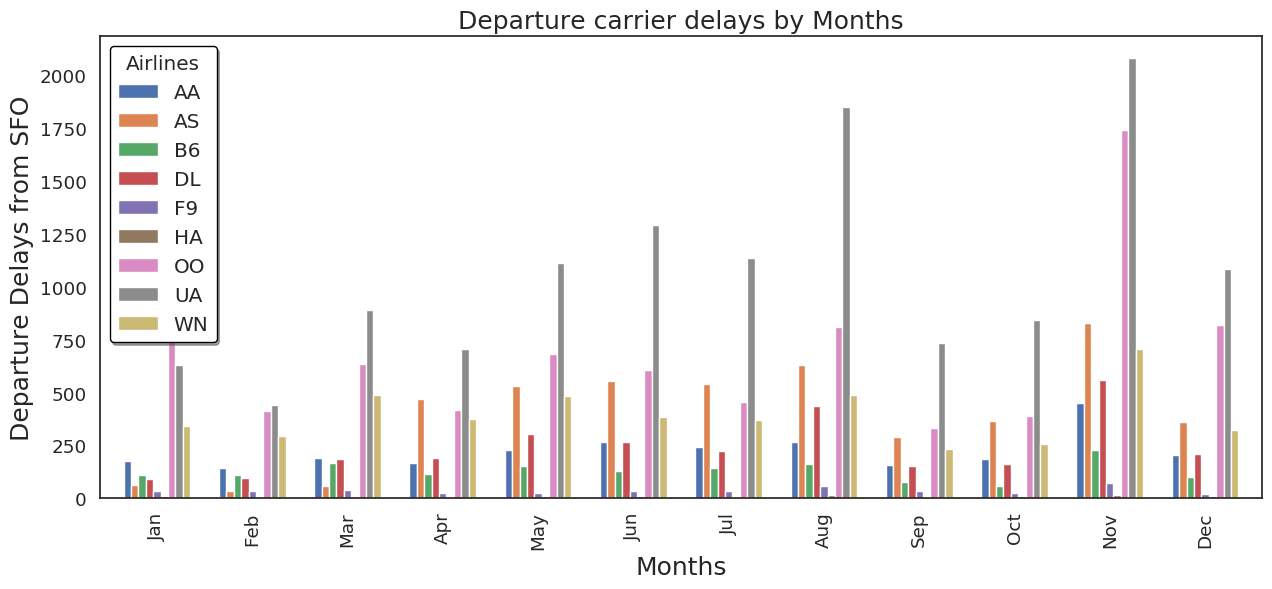

In [0]:
# plotting Total departure delayed by carriers for each months
table_depdelay.plot(kind='bar',figsize=(15,6), width=0.7, align='center')
plt.xlabel('Months',fontsize='18')
plt.ylabel('Departure Delays from SFO',fontsize='18')
plt.title('Departure carrier delays by Months',fontsize='18')
plt.xticks(np.arange(len(table_depdelay.index)),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Airlines')             

#plt.savefig('OriginFlights_Departure carrier delays by months')

plt.show()

In [0]:
# Total departure delayed by carriers for each months
table_arrdelay = pd.pivot_table(sfoorigindf, values='ARRIVAL_DELAY_15', index='MONTH', columns='AIRLINE', aggfunc=np.sum)
# Airline VX is defunct now
table_arrdelay.drop(columns=['VX'], inplace=True)
table_arrdelay.head(12)

AIRLINE     AA      AS     B6     DL    F9    HA      OO      UA     WN
MONTH                                                                  
1        175.0    64.0  125.0   72.0  31.0   7.0   811.0   605.0  319.0
2        125.0    73.0   95.0   52.0  27.0   5.0   502.0   389.0  289.0
3        179.0    66.0  156.0  123.0  32.0  17.0   676.0   882.0  477.0
4        134.0   568.0  115.0  185.0  16.0  15.0   423.0   743.0  354.0
5        269.0   842.0  182.0  308.0  20.0  14.0   754.0  1316.0  510.0
6        302.0   760.0  134.0  262.0  35.0  12.0   693.0  1429.0  385.0
7        279.0   718.0  180.0  217.0  34.0   7.0   522.0  1430.0  379.0
8        284.0   802.0  193.0  389.0  54.0  20.0   820.0  2048.0  414.0
9        164.0   423.0   89.0  114.0  30.0  21.0   349.0   822.0  190.0
10       180.0   481.0   58.0  159.0  32.0   9.0   417.0   942.0  237.0
11       494.0  1000.0  278.0  584.0  74.0  26.0  1822.0  2424.0  668.0
12       251.0   485.0  125.0  210.0  21.0  22.0   948.0  1235.0  301.0

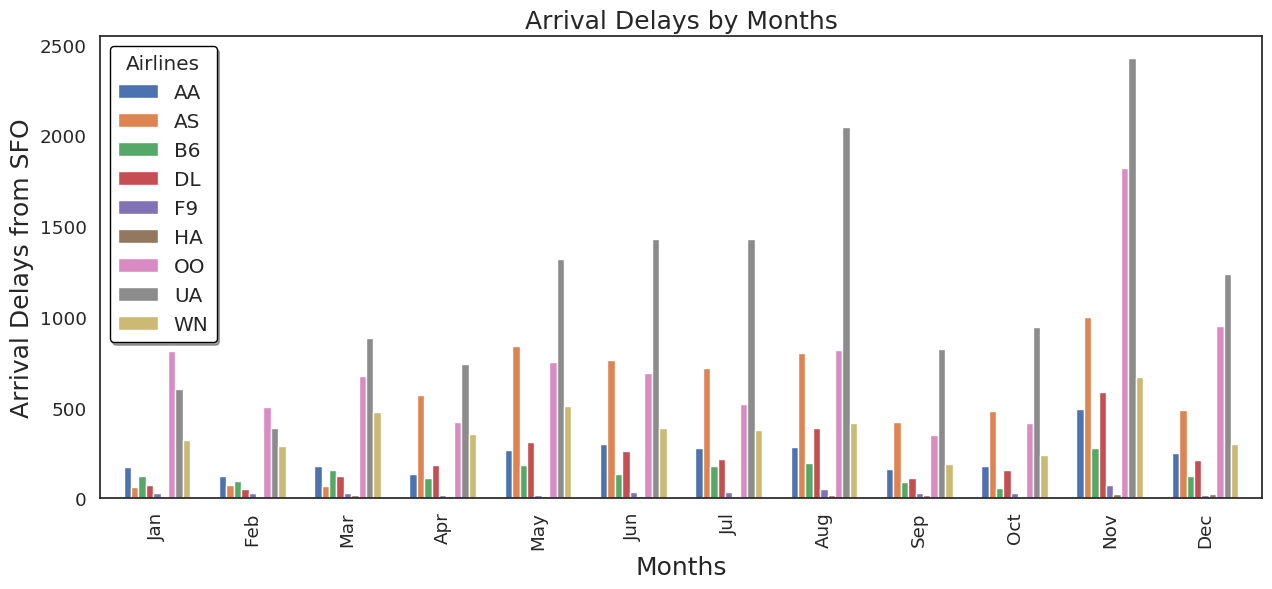

In [0]:
# plotting Total departure delayed by carriers for each months
table_arrdelay.plot(kind='bar',figsize=(15,6), width=0.7, align='center')
plt.xlabel('Months',fontsize='18')
plt.ylabel('Arrival Delays from SFO',fontsize='18')
plt.title('Arrival Delays by Months',fontsize='18')
plt.xticks(np.arange(len(table_arrdelay.index)),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Airlines')             

plt.show()

In [0]:
td = sfoorigindf['AIRLINE'].value_counts()
td = pd.DataFrame(td)
td = td.rename(columns={'AIRLINE':'Total_Flights'})
td = td.sort_index()
td = td.reset_index()
td = td.rename(columns={'index':'AIRLINE'})


dd = table_depdelay.sum()
dd = pd.DataFrame(dd)
dd = dd.rename(columns={0:'Departure_Delayed_Flights'})
dd = dd.reset_index()
dd = pd.DataFrame(dd)



ad = table_arrdelay.sum()
ad = pd.DataFrame(ad)
ad = ad.rename(columns={0:'Arrival_Delayed_Flights'})
ad = ad.reset_index()
ad = pd.DataFrame(ad)

In [0]:
#Total arrival and departure delays vs. Total flights per carrier.
del_table_total = pd.merge(dd,td)
del_table_total = pd.merge(del_table_total,ad)
del_table_total

AIRLINE  Departure_Delayed_Flights  Total_Flights  Arrival_Delayed_Flights
0      AA                     2678.0          14597                   2836.0
1      AS                     4739.0          23503                   6282.0
2      B6                     1562.0           6314                   1730.0
3      DL                     2876.0          15322                   2675.0
4      F9                      443.0           1123                    406.0
5      HA                      114.0            802                    175.0
6      OO                     8087.0          39437                   8737.0
7      UA                    12798.0          65081                  14265.0
8      WN                     4750.0          18077                   4523.0

In [0]:
#Total departure delays in 2018
del_table_total.Departure_Delayed_Flights.sum()

38047.0

In [0]:
#Total arrival delays in 2018
del_table_total.Arrival_Delayed_Flights.sum()

41629.0

In [0]:
del_table_total.Total_Flights.sum()

184256

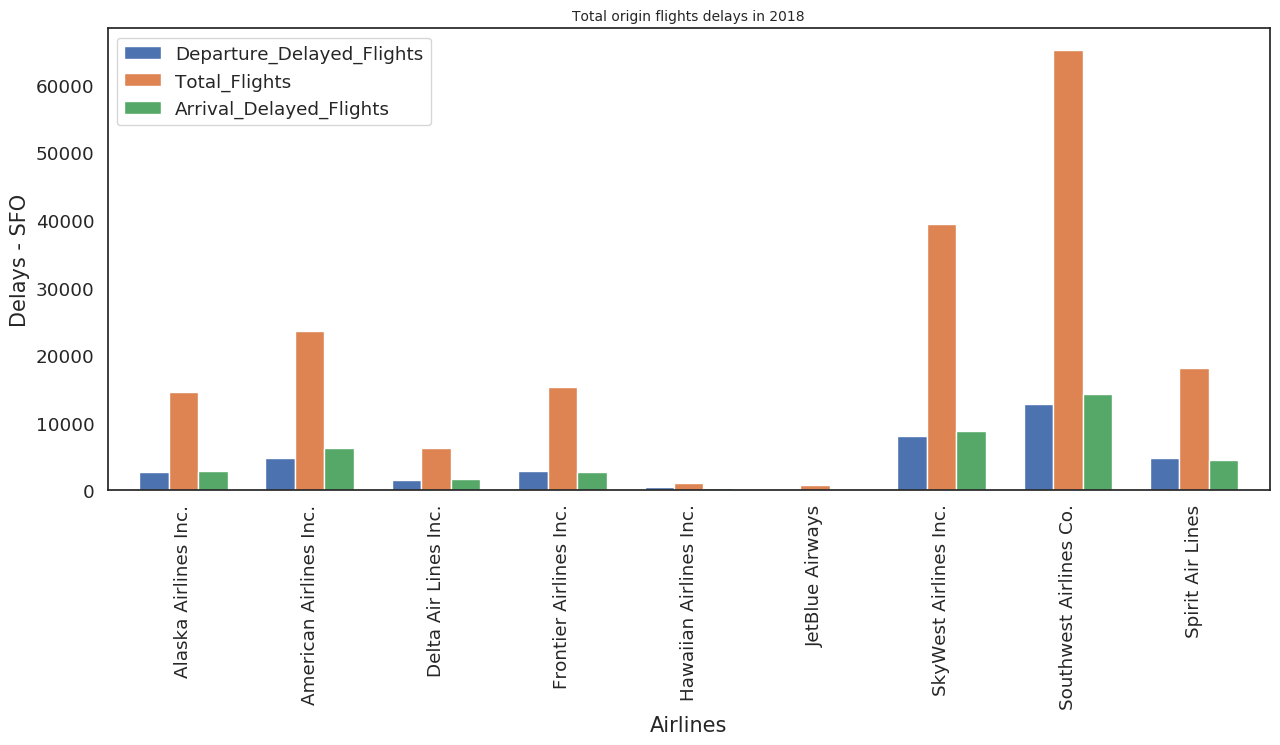

In [0]:

del_table_total.plot(kind='bar',figsize=(15,6), width=0.7, align='center')
plt.xticks(np.arange(len(del_table_total.AIRLINE)),('Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines', 'United Air Lines Inc.',
       'Virgin America'))
plt.xlabel('Airlines', fontsize=15)
plt.ylabel('Delays - SFO', fontsize=15)
plt.title('Total origin flights delays in 2018',fontsize=10)
plt.savefig("Origin flights delayed in 2018")
plt.show()

In [0]:
plt.style.use('ggplot')

In [0]:
outbound = sfoorigindf.copy()
inbound = sfodestdf.copy()

In [0]:
# Calculate total flights per month
total_outbound_flights = outbound.groupby(['MONTH']).count()
total_outbound_flights = pd.DataFrame(total_outbound_flights['TAIL_NUMBER'])
total_outbound_flights = total_outbound_flights.rename(columns={'TAIL_NUMBER':'Outbound Flights'})

total_inbound_flights = inbound.groupby(['MONTH']).count()
total_inbound_flights = pd.DataFrame(total_inbound_flights['TAIL_NUMBER'])
total_inbound_flights = total_inbound_flights.rename(columns={'TAIL_NUMBER':'Inbound Flights'})

total_flights = pd.concat([total_outbound_flights, total_inbound_flights], axis=1, join_axes=[total_outbound_flights.index])
total_flights['Total Flights'] = total_flights.sum(axis=1)
total_flights = total_flights[['Total Flights']]

In [0]:
#Outbound Flight Delays
outbound_delays = outbound.loc[outbound['DEPARTURE_DELAY_15'] == 1]
total_outbound_delays = len(outbound_delays['FLIGHT_NUMBER'])

monthly_outbound = outbound_delays.groupby(['MONTH']).sum()
m_outbound_sum = pd.DataFrame(monthly_outbound['DEPARTURE_DELAY_15'])

#Inbound Flight Delays
inbound_delays = inbound.loc[inbound['ARRIVAL_DELAY_15'] == 1]
total_inbound_delays = len(inbound_delays['FLIGHT_NUMBER'])

monthly_inbound = inbound_delays.groupby(['MONTH']).sum()
m_inbound_sum = pd.DataFrame(monthly_inbound['ARRIVAL_DELAY_15'])

In [0]:
merged = m_outbound_sum.join(m_inbound_sum)
merged['AllDelays'] = merged.sum(axis=1)
total_delays = pd.DataFrame(merged['AllDelays']).astype(int)

# Calculate percentage delayed flights per month
perc_delays = pd.concat([total_delays, total_flights], axis=1, join_axes=[total_delays.index])
perc_delays['Delay Percentage'] = round((perc_delays['AllDelays']/perc_delays['Total Flights'])*100, 2)
perc_delays = perc_delays[['Delay Percentage']]


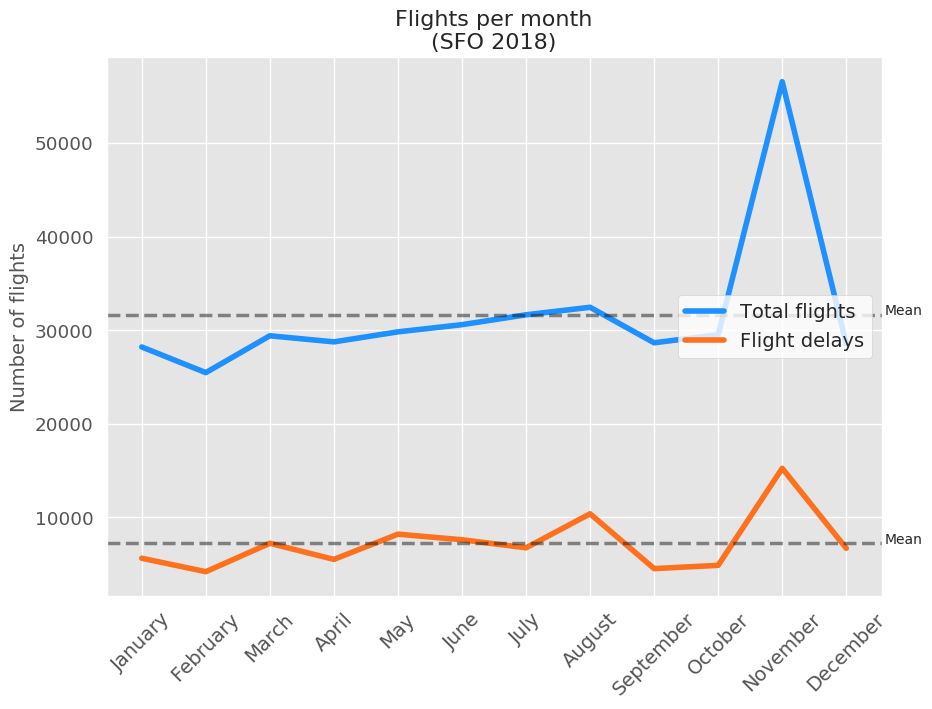

In [0]:
import calendar
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]
mean_flight = np.mean(total_flights['Total Flights'])
mean_delay = np.mean(total_delays['AllDelays'])

plt.figure(figsize=(10,7))
plt.plot(x_axis, total_flights['Total Flights'], label='Total flights', linewidth=4,color='#1E90FF')
plt.plot(x_axis, total_delays['AllDelays'], label='Flight delays', linewidth=4,color='#ff711e')

plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Number of flights', size=14)
plt.title('Flights per month\n(SFO 2018)', size=16)
legend = plt.legend(loc=5, fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.axhline(y=mean_flight, color='k',linestyle='--', alpha=0.5)
plt.axhline(y=mean_delay, color='k',linestyle='--', alpha=0.5)
plt.text(11.6,mean_flight, 'Mean')
plt.text(11.6,mean_delay, 'Mean')

#plt.savefig('images/flights_per_month.png', bbox_inches='tight')
plt.show()

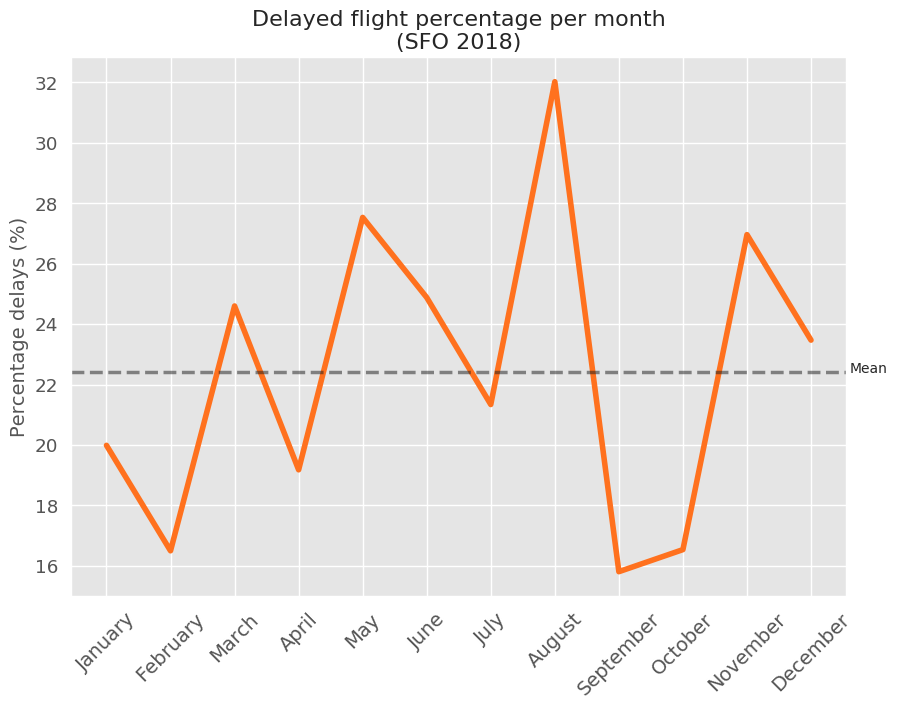

In [0]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]
mean_percent = np.mean(perc_delays['Delay Percentage'])

plt.figure(figsize=(10,7))
plt.plot(x_axis, perc_delays['Delay Percentage'], linewidth=4,color='#ff711e')
plt.xticks(x_axis, months, rotation=45, size=14)
#plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Percentage delays (%)', size=14)
plt.title('Delayed flight percentage per month\n(SFO 2018)', size=16)
plt.axhline(y=mean_percent, color='k', alpha=0.5, linestyle='--')
plt.text(11.6,mean_percent, 'Mean')

#plt.savefig('images/flight_delay_percent.png', bbox_inches='tight')
plt.show()

In [0]:
# Test for normal distribution

z_flight,pval_flight = scipy.stats.normaltest(total_flights['Total Flights'])
if(pval_flight < 0.05):
    print("Total Flights: Not normal distribution")
elif(pval_flight >= 0.05):
    print("Total Flights: Normal distribution")
    
z_delay,pval_delay = scipy.stats.normaltest(total_delays['AllDelays'])
if(pval_delay < 0.05):
    print("Total Delays: Not normal distribution")
elif(pval_delay >= 0.05):
    print("Total Delays: Normal distribution")

Total Flights: Not normal distribution
Total Delays: Not normal distribution


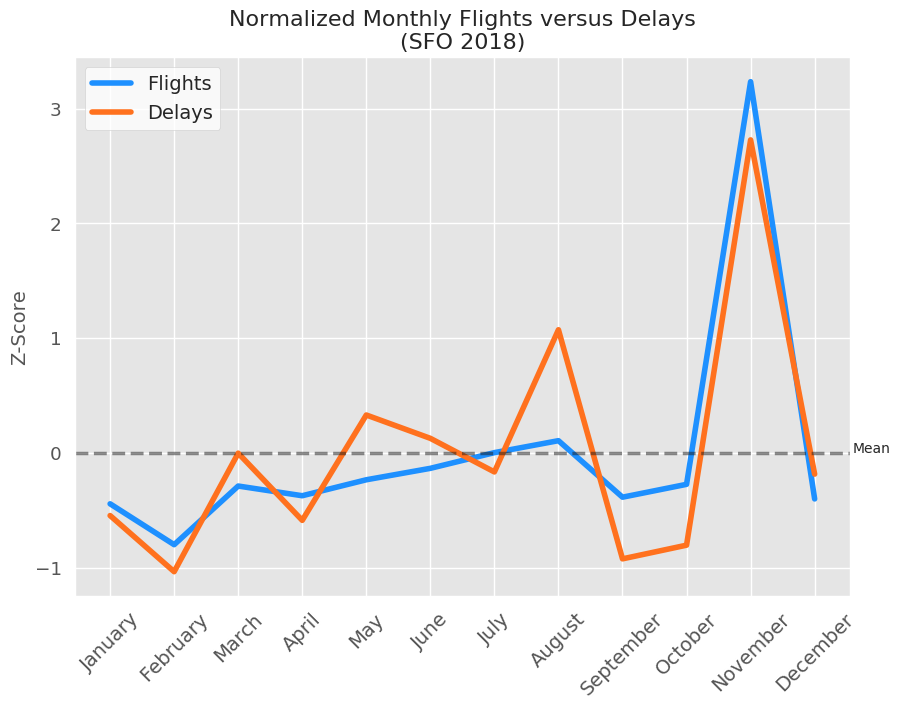

In [0]:
x_axis = np.arange(0,12,1)
months = calendar.month_name[1:13]

zscore_delay = scipy.stats.zscore(total_delays['AllDelays'])
zscore_flights = scipy.stats.zscore(total_flights['Total Flights'])

plt.figure(figsize=(10,7))

plt.plot(x_axis, zscore_flights, label='Flights',linewidth=4, color='#1E90FF')
plt.plot(x_axis, zscore_delay, label='Delays',linewidth=4, color='#ff711e')
plt.title('Normalized Monthly Flights versus Delays\n(SFO 2018)', size=16)
plt.xticks(x_axis, months, rotation=45, size=14)
plt.ylabel('Z-Score', size=14)
plt.axhline(0,color='k',alpha=0.5, linestyle='--')
plt.text(11.6,0, 'Mean')

legend = plt.legend(loc='best', fontsize=14)
frame = legend.get_frame()
frame.set_facecolor('1')

#plt.savefig('images/flight_delay_zscores.png', bbox_inches='tight')
plt.show()

In [0]:
plt.style.use('ggplot')
#Filter by delayed flights
outbound_delays = outbound.loc[outbound['DEPARTURE_DELAY_15'] == 1]
inbound_delays = inbound.loc[inbound['ARRIVAL_DELAY_15'] == 1]

In [0]:
sfoorigindf.columns

Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
       'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED',
       'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',
       'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON', 'YEAR', 'DEPARTURE_DELAY_15',
       'ARRIVAL_DELAY_15'],
      dtype='object')

In [0]:
delay_columns = ['WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY']
for col in delay_columns:
    sfoorigindf[col] = sfoorigindf[col].replace(np.nan, 0)
    sfodestdf[col] = sfodestdf[col].replace(np.nan, 0)



In [0]:
#Filter to causes of delay and remove NaN
outbound_cause = outbound_delays[['MONTH', 'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY']]
outbound_cause = outbound_cause.dropna(axis=0, how='any').reset_index(drop=True)

inbound_cause = inbound_delays[['MONTH', 'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY']]
inbound_cause = inbound_cause.dropna(axis=0, how='any').reset_index(drop=True)

#Combine outbound and inbound delays
frames = [outbound_cause, inbound_cause]
all_cause = pd.concat(frames)
all_cause_year = all_cause[['WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY']]

#Boolean delay causes
all_cause_bool = pd.DataFrame()
for col in all_cause_year:
    all_cause_bool[col] = (all_cause_year[col] > 0).astype(int)
    
#Delayed Minutes
outbound_delay_minutes = int(outbound_delays['DEPARTURE_DELAY'].sum())
inbound_delay_minutes = int(inbound_delays['ARRIVAL_DELAY'].sum())
total_delay_minutes = outbound_delay_minutes + inbound_delay_minutes

per_cause_delay_minutes = [round(x) for x in all_cause_year.sum().tolist()]

#Percentage delays per cause
percent_minutes_delay = [round((x/total_delay_minutes)*100, 2) for x in per_cause_delay_minutes]

percent_df = pd.DataFrame()
percent_df['Cause'] = ['Extreme Weather','Security','Late-arriving Aircraft','Natl. Aviation System','Air Carrier']
percent_df['Percent delay'] = percent_minutes_delay
percent_df = percent_df.sort_values('Percent delay', ascending=False).reset_index(drop=True)

delay_counts = all_cause_bool.sum()

percent_delay_flight = [round((x/delay_counts.sum())*100, 2) for x in delay_counts]
percent_delay_flight
percent_flight_df = pd.DataFrame()
percent_flight_df['Cause'] = ['Extreme Weather','Security','Late-arriving Aircraft','Natl. Aviation System','Air Carrier']
percent_flight_df['Percent flight delays'] = percent_delay_flight
percent_flight_df = percent_flight_df.sort_values('Percent flight delays', ascending=False).reset_index(drop=True)

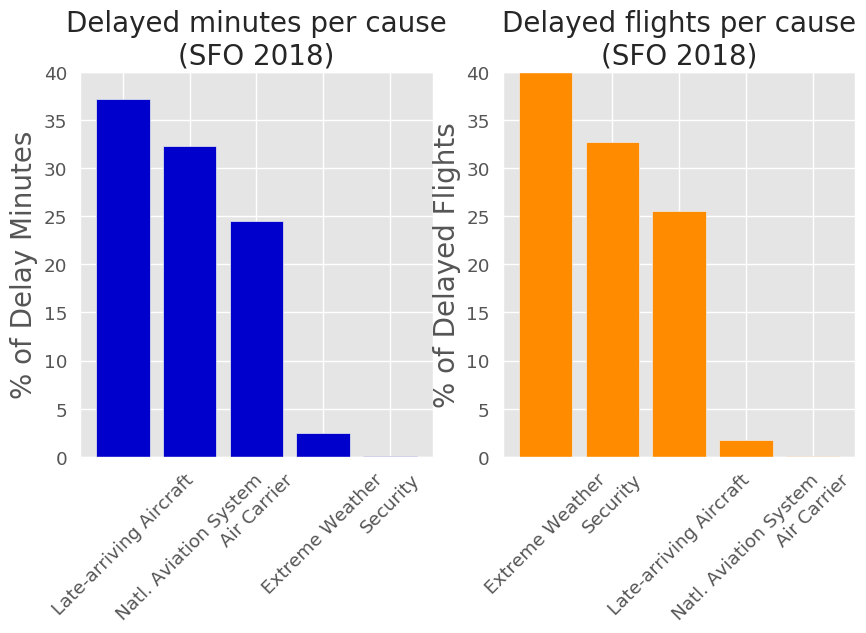

In [0]:
#Plot summary bar charts
x_axis = np.arange(1,6,1)
cause_name = ['Extreme Weather','Security','Late-arriving Aircraft','Natl. Aviation System','Air Carrier']

plt.figure(figsize=(10,5))
y_axis = np.arange(0,45,5)

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)

ax1.bar(x_axis, percent_df['Percent delay'], color='#0000CD')
ax1.set_title('Delayed minutes per cause\n(SFO 2018)', size=20)
ax1.set_xticks(x_axis)
ax1.set_xticklabels(percent_df['Cause'], rotation=45)
ax1.set_ylabel('% of Delay Minutes', size=20)
ax1.set_yticks(y_axis)
ax1.set_ylim(0,40)

ax2.bar(x_axis, percent_flight_df['Percent flight delays'], color='#FF8C00')
ax2.set_title('Delayed flights per cause\n(SFO 2018)', size=20)
ax2.set_xticks(x_axis)
ax2.set_xticklabels(cause_name, rotation=45)
ax2.set_yticks(y_axis)
ax2.set_ylabel('% of Delayed Flights', size=20)
ax2.set_ylim(0,40)

#plt.savefig('images/yearly_delay_cause.png', bbox_inches='tight')
plt.show()

In [0]:
#Monthly cause of delay

monthly_delay_minutes = all_cause.groupby(['MONTH']).sum().astype(int)
monthly_delay_minutes['Total'] = monthly_delay_minutes.sum(axis=1)

monthly_percentage_df = pd.DataFrame()

for col in monthly_delay_minutes:
    monthly_percentage_df[col] = round((monthly_delay_minutes[col]/monthly_delay_minutes['Total'])*100, 2)

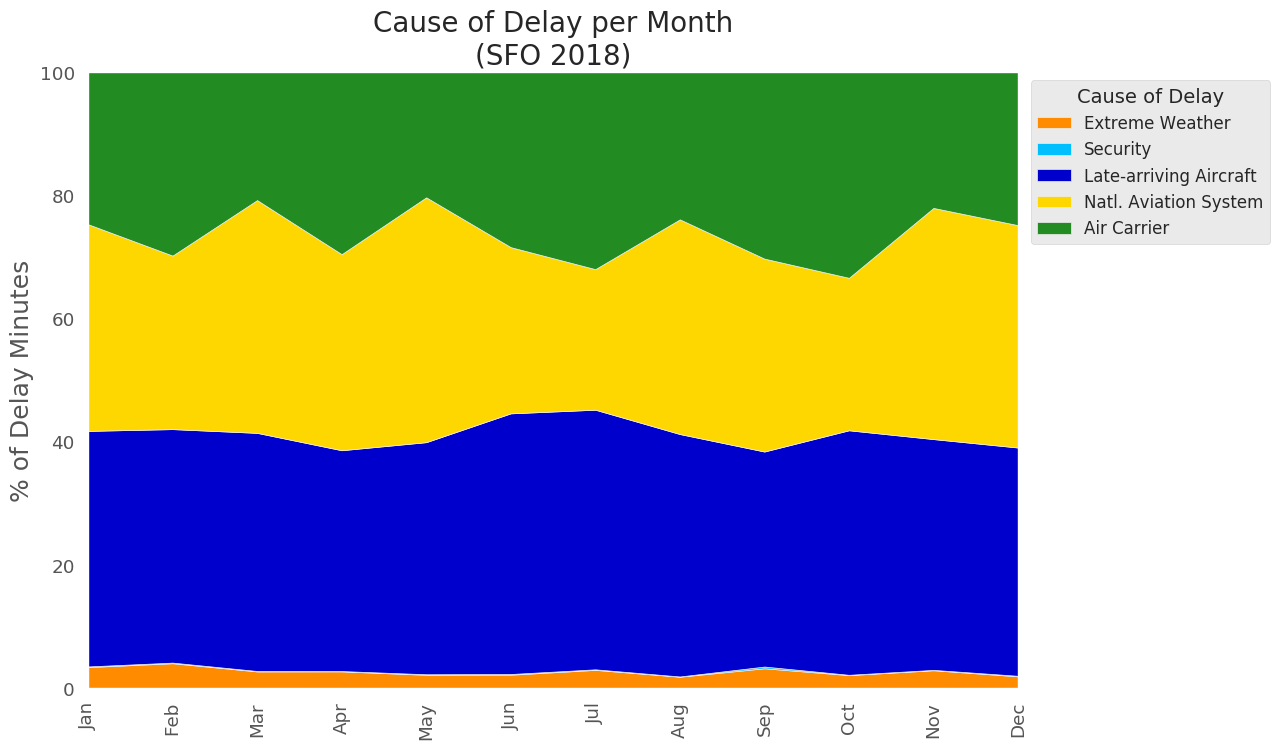

In [0]:

months = calendar.month_abbr[1:13]
x_axis = np.arange(0, 12, 1)
cause = ['Extreme Weather','Security','Late-arriving Aircraft','Natl. Aviation System','Air Carrier']
      #['WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY']

plt.figure(figsize=(12,8))
plt.stackplot(x_axis,
              monthly_percentage_df['WEATHER_DELAY'],
              monthly_percentage_df['SECURITY_DELAY'],
              monthly_percentage_df['LATE_AIRCRAFT_DELAY'],
              monthly_percentage_df['AIR_SYSTEM_DELAY'],
              monthly_percentage_df['AIRLINE_DELAY'],
              colors=['#FF8C00','#00BFFF','#0000CD','#FFD700','#228B22'],
              labels=cause)
plt.xticks(x_axis, months, rotation='vertical')
plt.title('Cause of Delay per Month\n(SFO 2018)', size=20)
plt.ylabel('% of Delay Minutes', size=18)

legend = plt.legend(bbox_to_anchor=(1.28,1), loc="upper right", fontsize=12)
legend.set_title('Cause of Delay', prop={'size':14})

plt.margins(0)
#plt.savefig('images/monthly_delay_cause.png', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

In [0]:
result = pd.concat([sfoorigindf,sfodestdf],ignore_index=True)
#Creating Variables
total_delay=0
total_flight=len(result)
airlines=list(result['AIRLINE'].unique())
total_carrier_delay={"Flights": {},
                    "Delays": {}}

In [0]:
#Caluclate total flights and delays per carrier
for index,row in result.iterrows():
    total_carrier_delay['Flights'][row['AIRLINE']] =  total_carrier_delay['Flights'].get(row['AIRLINE'], 0) + 1
    if (row['ORIGIN_AIRPORT']=='SFO' and row['DEPARTURE_DELAY']>=15) or (row['DESTINATION_AIRPORT']=='SFO' and row['ARRIVAL_DELAY']>=15):
        total_delay = total_delay+1
        total_carrier_delay['Delays'][row['AIRLINE']] =  total_carrier_delay['Delays'].get(row['AIRLINE'], 0) + 1

In [0]:
#Creating DataFrame of total flights and delays
total_airline_delay=pd.DataFrame(columns=["Airline","Total Flights","Total Delays"])

In [0]:
for index, key in enumerate(total_carrier_delay['Flights']):
    total_airline_delay.loc[index] = [key, total_carrier_delay['Flights'][key], total_carrier_delay['Delays'][key] ]


total_airline_delay['% Delays']=total_airline_delay['Total Delays']/total_airline_delay['Total Flights'] * 100
total_airline_delay['% Delays'] = total_airline_delay['% Delays'].map("{:.0f}".format)
# total_airline_delay=total_airline_delay.drop(labels=index)
total_airline_delay=total_airline_delay.sort_values('% Delays',ascending=True)
total_airline_delay

Airline Total Flights Total Delays % Delays
4      HA          1605          292       18
6      VX         11505         2317       20
9      DL         30651         6209       20
0      UA        130302        27013       21
1      AS         47022        10785       23
8      AA         29193         6778       23
5      OO         78968        18914       24
2      B6         12648         3242       26
7      WN         36156        10450       29
3      F9          2246          914       41

In [0]:
#Total Percentage of delay in SFO
percentage_delay = round((total_delay/total_flight)*100)
airport_df=pd.DataFrame(columns=["Airline","Total Flights","Total Delays"])
airport_df=pd.DataFrame({'Airline':['SFO'],
                       'Total Flights':[total_flight],
                       'Total Delays':[total_delay],
                       '% Delays':[percentage_delay]})
airport_df=airport_df[["Airline","Total Flights","Total Delays","% Delays"]]
airport_df

Airline  Total Flights  Total Delays  % Delays
0     SFO         380296         86914        23

In [0]:
airport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
Airline          1 non-null object
Total Flights    1 non-null int64
Total Delays     1 non-null int64
% Delays         1 non-null int64
dtypes: int64(3), object(1)
memory usage: 160.0+ bytes


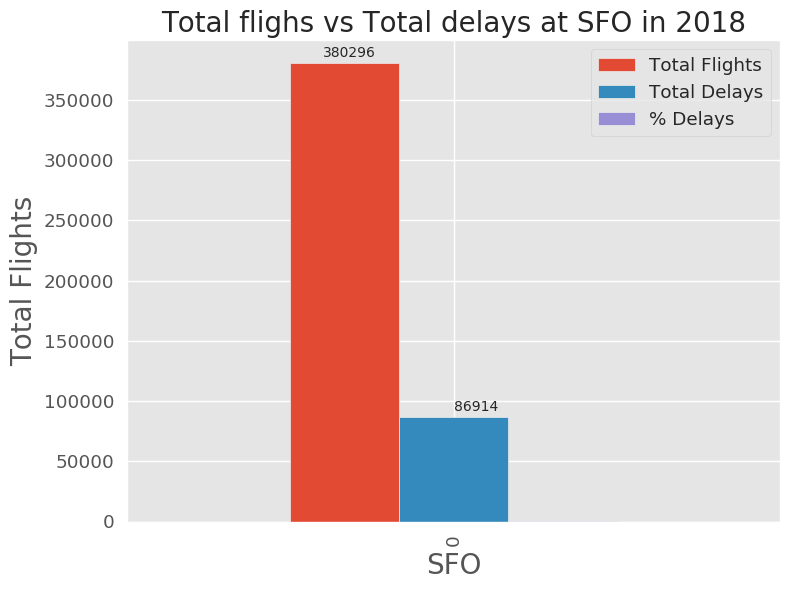

Airline  Total Flights  Total Delays  % Delays
0     SFO         380296         86914        23

In [0]:
#Plot for total flight vs delay in SFO
airport_df.plot.bar(figsize=(8,6))
plt.xlabel('SFO',size=20)
plt.ylabel('Total Flights',size=20)
plt.title('Total flighs vs Total delays at SFO in 2018',size=20)
for key,x in airport_df.iterrows(): 
    plt.text(-0.2,x['Total Flights']+5000, x['Total Flights'])
    plt.text(0,x['Total Delays']+5000, x['Total Delays'])
plt.tight_layout()
#plt.savefig('flights vs delay')
plt.show()
airport_df

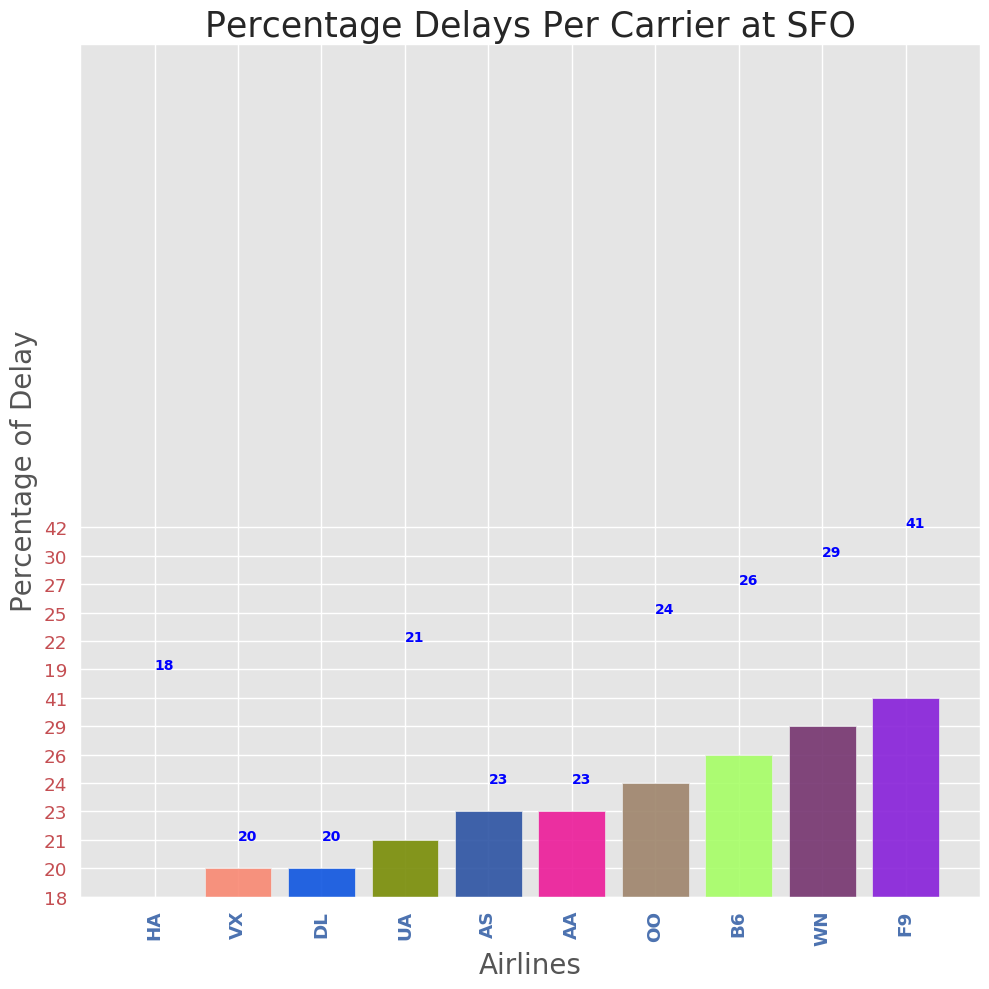

In [0]:
# Set x axis and tick locations
x_axis = np.arange(len(total_airline_delay))
tick_locations = [value for value in x_axis]

total_airline_delay=total_airline_delay.sort_values('% Delays',ascending=True)
plt.figure(figsize=(10,10))
plt.bar(x_axis,total_airline_delay['% Delays'],align='center',alpha=0.9,color=np.random.rand(20,3))#label=total_airline_delay["Airline"]
plt.xticks(tick_locations, total_airline_delay["Airline"], rotation="vertical",color='b',fontweight='bold')
plt.yticks(color='r')
# plt.legend()
temp=-1
for key,x in total_airline_delay.iterrows():
    temp=temp+1
    plt.text(temp,str(int(x['% Delays'])+1),str(x["% Delays"]),color='blue',fontweight='bold')

plt.ylabel('Percentage of Delay',size=20)
plt.ylim(0,30)
plt.xlabel('Airlines',size=20)
plt.title('Percentage Delays Per Carrier at SFO',size=25)
# total_airline_delay['Airline'].plt.bar()
plt.tight_layout()
plt.savefig('Percentage of Airline delay')
plt.show()

In [0]:
total_airline_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 3
Data columns (total 4 columns):
Airline          10 non-null object
Total Flights    10 non-null object
Total Delays     10 non-null object
% Delays         10 non-null object
dtypes: object(4)
memory usage: 400.0+ bytes


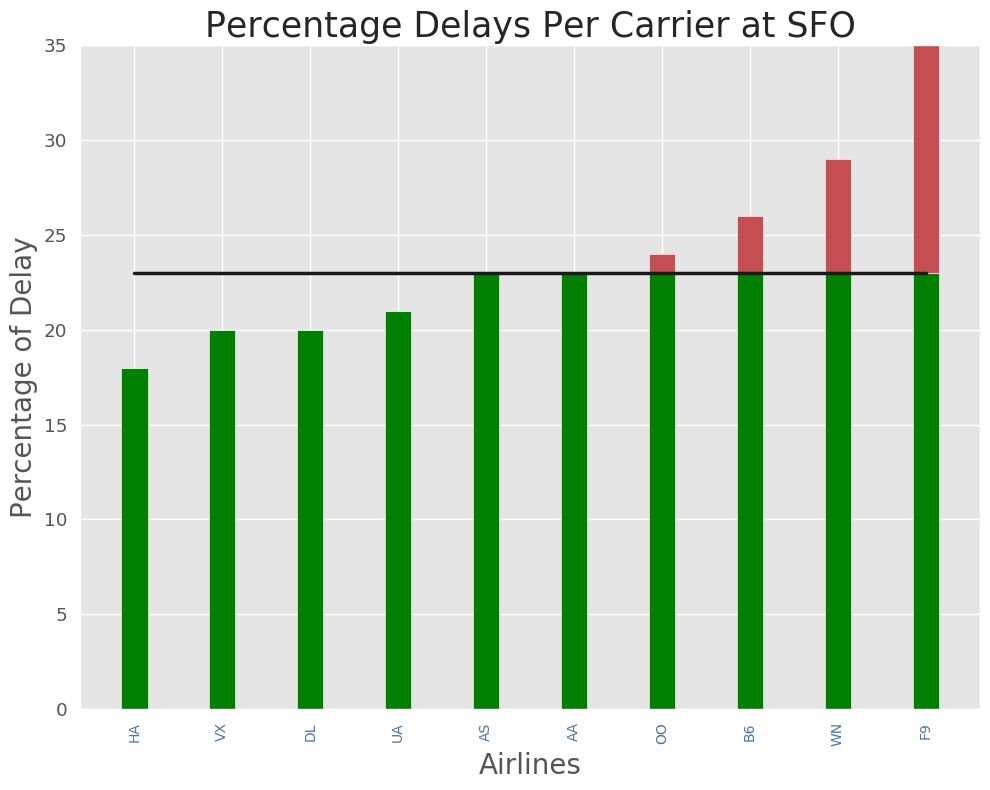

In [0]:
# some example data
values = np.array(total_airline_delay['% Delays']).astype(np.float)
x = range(len(total_airline_delay['Airline']))

# split it up
above_avg_delay = np.maximum(values - float(percentage_delay), 0)
below_avg_delay = np.minimum(values, float(percentage_delay))

# # and plot it
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x, below_avg_delay, 0.3, color="green")
ax.bar(x, above_avg_delay, 0.3, color="r", bottom=below_avg_delay)

# # # horizontal line indicating the threshold
ax.plot([0,x[-1]], [int(percentage_delay),int(percentage_delay)],'k-')

plt.xticks(x, total_airline_delay["Airline"], rotation="vertical",color='b',size=10)
plt.ylim(0,35)
plt.ylabel('Percentage of Delay',size=20)
plt.xlabel('Airlines',size=20)
plt.title('Percentage Delays Per Carrier at SFO',size=25)
plt.tight_layout()
#plt.savefig('Carriers over average airport delay')
plt.show()

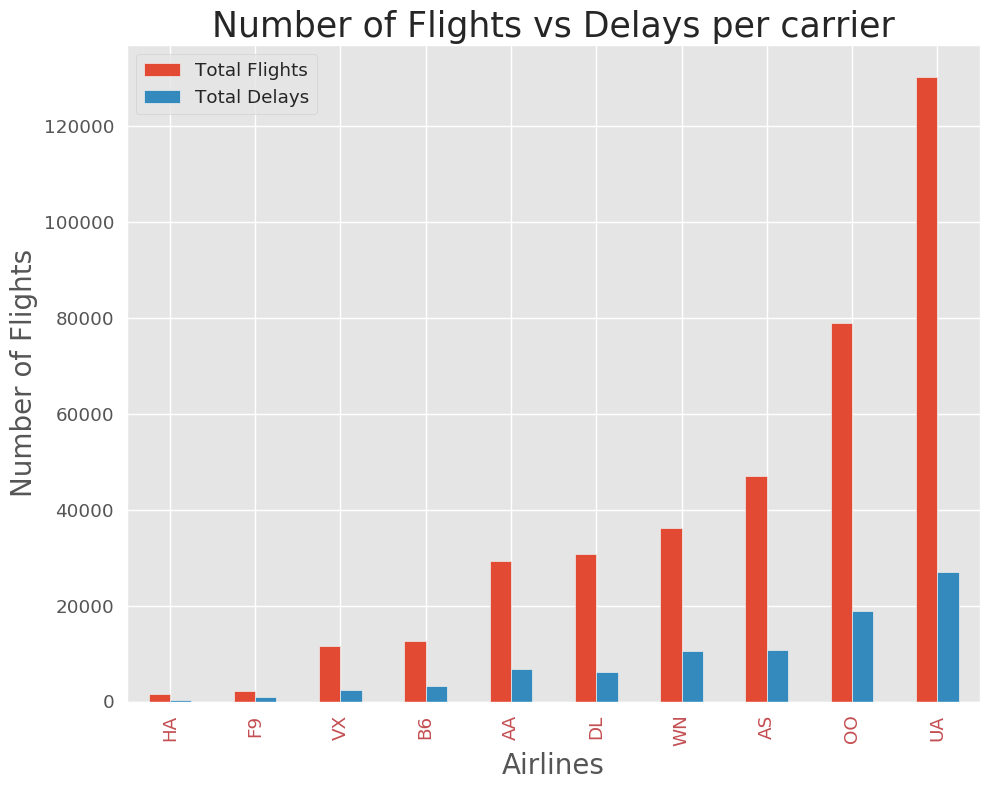

In [0]:
total_airline_delay=total_airline_delay.sort_values('Total Flights',ascending=True)
total_airline_delay
total_airline_delay.plot.bar(figsize=(10,8))
plt.xticks(x, total_airline_delay["Airline"], rotation="vertical",color='r')
plt.xlabel('Airlines',size=20)
plt.ylabel('Number of Flights',size=20)
plt.title('Number of Flights vs Delays per carrier',size=25)
plt.tight_layout()
plt.savefig('flights vs delay - Carrier')
plt.show()

In [0]:
sfoorigindf.head()

AIRLINE  AIRLINE_DELAY  AIR_SYSTEM_DELAY  AIR_TIME  ARRIVAL_DELAY  \
0      UA            0.0               0.0      62.0          -13.0   
1      UA            0.0               0.0     221.0          -22.0   
2      UA            0.0               0.0      32.0          -18.0   
3      UA            0.0               0.0     331.0           12.0   
4      UA            0.0               0.0     179.0          -22.0   

   ARRIVAL_TIME CANCELLATION_REASON  CANCELLED  DAY  DAY_OF_WEEK  \
0        1208.0                 NaN        0.0   27            6   
1        1851.0                 NaN        0.0   27            6   
2        2341.0                 NaN        0.0   27            6   
3        1711.0                 NaN        0.0   27            6   
4        1553.0                 NaN        0.0   27            6   

   DEPARTURE_DELAY  DEPARTURE_TIME DESTINATION_AIRPORT  DISTANCE  DIVERTED  \
0             -9.0          1033.0                 LAS     414.0       0.0   
1            -14.0          1146.0                 IND    1943.0       0.0   
2             -6.0          2248.0                 RNO     192.0       0.0   
3             -5.0          1315.0                 HNL    2398.0       0.0   
4             -8.0          1032.0                 DFW    1464.0       0.0   

   ELAPSED_TIME  FLIGHT_NUMBER  LATE_AIRCRAFT_DELAY  MONTH ORIGIN_AIRPORT  \
0          95.0            358                  0.0      1            SFO   
1         245.0            317                  0.0      1            SFO   
2          53.0            313                  0.0      1            SFO   
3         356.0            300                  0.0      1            SFO   
4         201.0            294                  0.0      1            SFO   

   SCHEDULED_ARRIVAL  SCHEDULED_DEPARTURE  SCHEDULED_TIME  SECURITY_DELAY  \
0               1221                 1042            99.0             0.0   
1               1913                 1200           253.0             0.0   
2               2359                 2254            65.0             0.0   
3               1659                 1320           339.0             0.0   
4               1615                 1040           215.0             0.0   

  TAIL_NUMBER  TAXI_IN  TAXI_OUT  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  \
0      N36469      7.0      26.0            0.0      1059.0     1201.0  2018   
1      N38268      6.0      18.0            0.0      1204.0     1845.0  2018   
2      N14214      5.0      16.0            0.0      2304.0     2336.0  2018   
3      N768UA      4.0      21.0            0.0      1336.0     1707.0  2018   
4      N834UA      6.0      16.0            0.0      1048.0     1547.0  2018   

   DEPARTURE_DELAY_15  ARRIVAL_DELAY_15  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0

In [0]:
import warnings
import matplotlib.pyplot as plt
import sklearn.cluster.k_means_
import seaborn as sns
import plotly.graph_objects as go

from time import time
from sklearn import mixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

from scipy.spatial.distance import cdist
%matplotlib inline


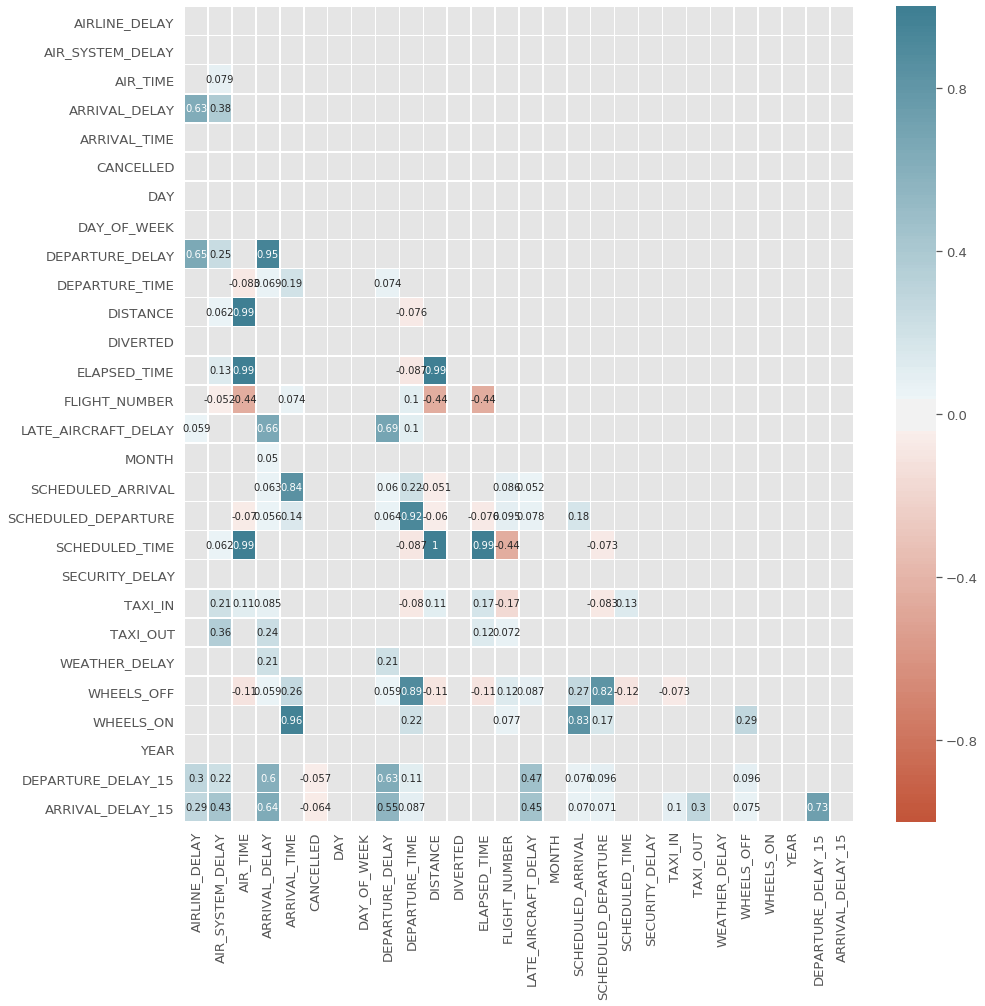

In [0]:
Cor = sfoorigindf[sfoorigindf.columns] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cor[(cor >= 0.05) | (cor <= -0.05)], mask=mask, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), annot=True,linewidths=.5, ax=ax)


In [0]:
#sns.pairplot(sfoorigindf)

In [0]:
from sklearn.metrics import roc_auc_score

global algorithms_performace_df


def calculate_scores(y_test, y_pred, classifier):
    global algorithms_performace

    accuracyScore = round(accuracy_score(y_test, y_pred) * 100,3)
    f1Score = round(f1_score(y_test, y_pred),3)
    recall = round(recall_score(y_test, y_pred),3)
    precisionScore =  round(precision_score(y_test, y_pred),3)
    mae= round(metrics.mean_absolute_error(y_test, y_pred),3)
    mse= round(metrics.mean_squared_error(y_test, y_pred),3)
    rmse= round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
    r2Score = round(r2_score(y_test, y_pred),3)
    cm = confusion_matrix(y_test, y_pred)
    rocScore = round(roc_auc_score(y_test,y_pred), 3)

    print('\n\nPrinting Scores for', classifier, 'Algorithm')
    print('Accuracy:', accuracyScore)
    print('F1 score:', f1Score)
    print('Recall:', recall)
    print('Precision:', precisionScore)
    print('R2Score:', r2Score)
    print('ROCScore:', rocScore)
    print('MAE', mae)
    print('MSE', mse)
    print('RMSE', rmse)
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    print('\n confussion matrix:\n',cm)
    print()

    performance = {'algorithm':classifier, 'accuracy': accuracyScore, 'precision':precisionScore, 'recall':recall, 'fscore':f1Score,
                   'r2score':r2Score, 'rocscore':rocScore, 'mae':mae, 'mse':mse,'rmse':rmse}
    algorithms_performace.append(performance)
    
    #Confusion Matrix
    
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix for '+classifier, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print('\n\n')

In [0]:
def classification_algorithm(DF, X_train_cols, y_train_col, clf, classifier):
    print(X_train_cols)
    print(y_train_col)
    X = DF[X_train_cols].iloc[ :, 0:]
    Y = DF[y_train_col]
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    calculate_scores(y_test, y_pred, classifier)
    if classifier == 'Decision Tree':
        from IPython.display import Image
        export_graphviz(clf, out_file = "ratingDCTree.dot", 
                                        feature_names =  X_train.columns, 
                                        rounded = True, proportion = False, 
                                        precision = 2, filled = True)
        from subprocess import call
        call(['dot', '-Tpng', 'ratingDCTree.dot', '-o', 'ratingDCTree.png', '-Gdpi=60'])
        # Display in jupyter notebook
        from IPython.display import Image
        display(Image(filename = 'ratingDCTree.png'))
    if classifier == 'Random Forest':
      estimator = clf.estimators_[2]
      # Export as dot file
      export_graphviz(estimator, out_file='rfTree.dot', 
                      feature_names = X_train.columns,
                      rounded = True, proportion = False, 
                      precision = 2, filled = True)
      # Convert to png using system command (requires Graphviz)
      from subprocess import call
      call(['dot', '-Tpng', 'rfTree.dot', '-o', 'rfTree.png', '-Gdpi=60'])
      # Display in jupyter notebook
      from IPython.display import Image
      display(Image(filename = 'rfTree.png'))


In [0]:
def create_algo_performance_df():
    global algorithms_performace
    global algorithms_performace_df
    algorithms_performace_df = pd.DataFrame(algorithms_performace)


In [0]:

def run_classification_algorithms(DF, X_train_cols, y_train_col, algorithms='all'):
    global algorithms_performace
    global algorithms_performace_df
    #if algorithms == 'all':
      #algorithms_performace = []
    if algorithms == 'all' or algorithms == 'Logistic Regression':
      classification_algorithm(DF, X_train_cols, y_train_col, LogisticRegression(random_state=100), 'Logistic Regression')
    if algorithms == 'all' or algorithms == 'Naive Bayes':
        classification_algorithm(DF, X_train_cols, y_train_col, GaussianNB(), 'Naive Bayes')
    if algorithms == 'all' or algorithms == 'Decision Tree':
        classification_algorithm(DF, X_train_cols, y_train_col, DecisionTreeClassifier(max_depth=5, random_state=100), 'Decision Tree')
    if algorithms == 'all' or algorithms == 'Random Forest':
        classification_algorithm(DF, X_train_cols, y_train_col, RandomForestClassifier(max_depth=5,n_estimators=3, random_state=100), 'Random Forest')
    if algorithms == 'SVM':
        classification_algorithm(DF, X_train_cols, y_train_col, SVC(random_state = 100), 'SVM')
    if algorithms == 'all' or algorithms == 'KNN':
      classification_algorithm(DF, X_train_cols, y_train_col, KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2), 'KNN')
    algorithms_performace_df = pd.DataFrame(algorithms_performace)
    if algorithms == 'all':    
        algorithms_performace_df.plot(x='algorithm', y='accuracy', kind='bar', color='green')
        print(algorithms_performace_df.head())


In [0]:
sfoorigindf = sfoorigindf.replace(np.nan, 0)
allcols = list(sfoorigindf.describe().columns)
allcols.remove('DEPARTURE_DELAY_15')
allcols.remove('ARRIVAL_DELAY_15')
print(allcols)

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']


['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
DEPARTURE_DELAY_15


Printing Scores for Logistic Regression Algorithm
Accuracy: 99.998
F1 score: 1.0
Recall: 1.0
Precision: 1.0
R2Score: 1.0
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.004

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45366
           1       1.00      1.00      1.00     11637

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[45365     1]
 [    0 11637]]



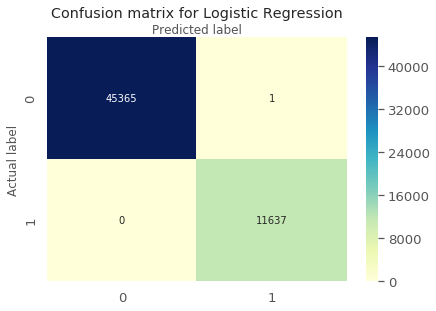




['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
DEPARTURE_DELAY_15


Printing Scores for Naive Bayes Algorithm
Accuracy: 94.825
F1 score: 0.867
Recall: 0.828
Precision: 0.91
R2Score: 0.681
ROCScore: 0.904
MAE 0.052
MSE 0.052
RMSE 0.227

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     45366
           1       0.91      0.83      0.87     11637

    accuracy                           0.95     57003
   macro avg       0.93      0.90      0.92     57003
weighted avg       0.95      0.95      0.95     57003


 confussion matrix:
 [[44413   953]
 [ 1997  9640]]



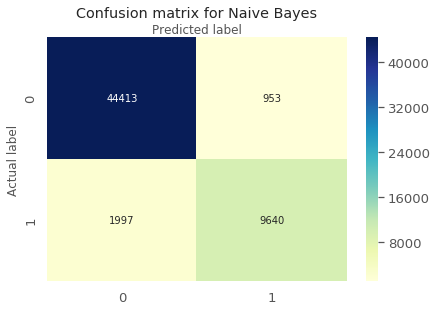




['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
DEPARTURE_DELAY_15


Printing Scores for Decision Tree Algorithm
Accuracy: 100.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0
R2Score: 1.0
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45366
           1       1.00      1.00      1.00     11637

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[45366     0]
 [    0 11637]]



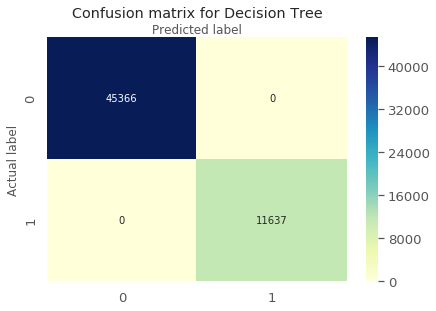

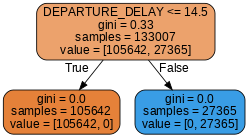

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
DEPARTURE_DELAY_15


Printing Scores for Random Forest Algorithm
Accuracy: 95.425
F1 score: 0.874
Recall: 0.778
Precision: 0.997
R2Score: 0.718
ROCScore: 0.889
MAE 0.046
MSE 0.046
RMSE 0.214

 clasification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     45366
           1       1.00      0.78      0.87     11637

    accuracy                           0.95     57003
   macro avg       0.97      0.89      0.92     57003
weighted avg       0.96      0.95      0.95     57003


 confussion matrix:
 [[45336    30]
 [ 2578  9059]]



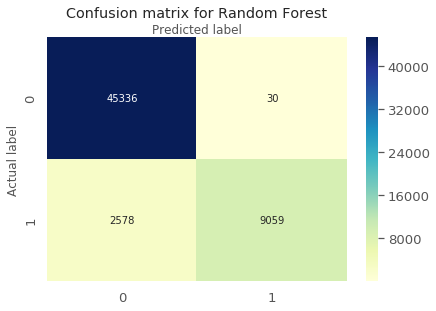

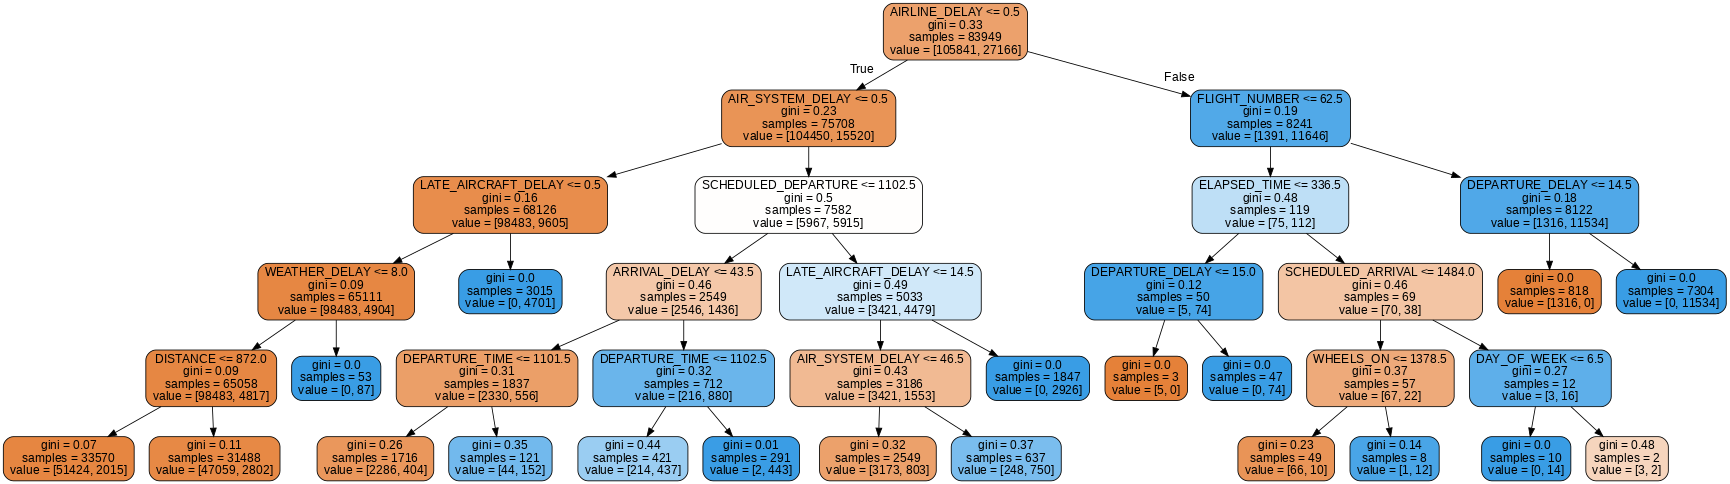

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
DEPARTURE_DELAY_15


Printing Scores for KNN Algorithm
Accuracy: 92.444
F1 score: 0.783
Recall: 0.667
Precision: 0.947
R2Score: 0.535
ROCScore: 0.829
MAE 0.076
MSE 0.076
RMSE 0.275

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     45366
           1       0.95      0.67      0.78     11637

    accuracy                           0.92     57003
   macro avg       0.93      0.83      0.87     57003
weighted avg       0.93      0.92      0.92     57003


 confussion matrix:
 [[44932   434]
 [ 3873  7764]]



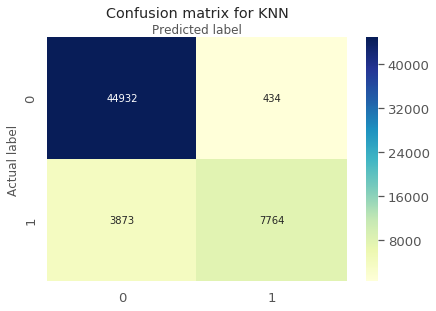




             algorithm  accuracy  precision  recall  fscore  r2score  \
0  Logistic Regression    99.998      1.000   1.000   1.000    1.000   
1          Naive Bayes    94.825      0.910   0.828   0.867    0.681   
2        Decision Tree   100.000      1.000   1.000   1.000    1.000   
3        Random Forest    95.425      0.997   0.778   0.874    0.718   
4                  KNN    92.444      0.947   0.667   0.783    0.535   

   rocscore    mae    mse   rmse  
0     1.000  0.000  0.000  0.004  
1     0.904  0.052  0.052  0.227  
2     1.000  0.000  0.000  0.000  
3     0.889  0.046  0.046  0.214  
4     0.829  0.076  0.076  0.275  


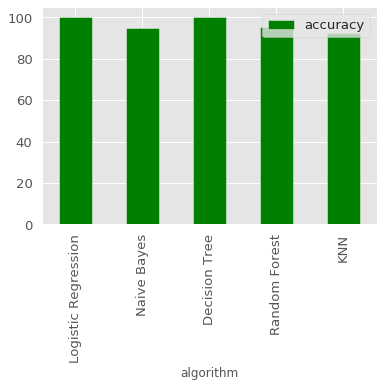

In [0]:
algorithms_performace = []
run_classification_algorithms(sfoorigindf,allcols, 'DEPARTURE_DELAY_15', 'all')

In [0]:
departure_performance_df = algorithms_performace_df.copy()
departure_performance_df.head(10)

algorithm  accuracy  precision  recall  fscore  r2score  \
0  Logistic Regression    99.998      1.000   1.000   1.000    1.000   
1          Naive Bayes    94.825      0.910   0.828   0.867    0.681   
2        Decision Tree   100.000      1.000   1.000   1.000    1.000   
3        Random Forest    95.425      0.997   0.778   0.874    0.718   
4                  KNN    92.444      0.947   0.667   0.783    0.535   

   rocscore    mae    mse   rmse  
0     1.000  0.000  0.000  0.004  
1     0.904  0.052  0.052  0.227  
2     1.000  0.000  0.000  0.000  
3     0.889  0.046  0.046  0.214  
4     0.829  0.076  0.076  0.275

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
ARRIVAL_DELAY_15


Printing Scores for Logistic Regression Algorithm
Accuracy: 99.982
F1 score: 1.0
Recall: 1.0
Precision: 1.0
R2Score: 0.999
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.013

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44256
           1       1.00      1.00      1.00     12747

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[44250     6]
 [    4 12743]]



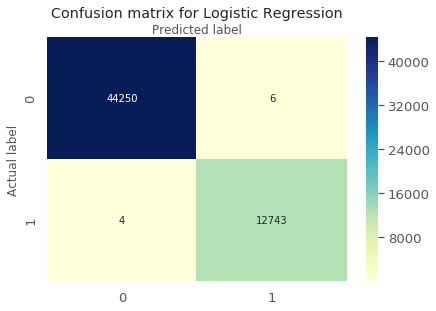




['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
ARRIVAL_DELAY_15


Printing Scores for Naive Bayes Algorithm
Accuracy: 99.974
F1 score: 0.999
Recall: 1.0
Precision: 0.999
R2Score: 0.998
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.016

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44256
           1       1.00      1.00      1.00     12747

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[44241    15]
 [    0 12747]]



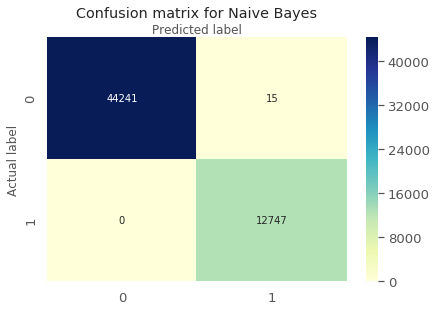




['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
ARRIVAL_DELAY_15


Printing Scores for Decision Tree Algorithm
Accuracy: 100.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0
R2Score: 1.0
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44256
           1       1.00      1.00      1.00     12747

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[44256     0]
 [    0 12747]]



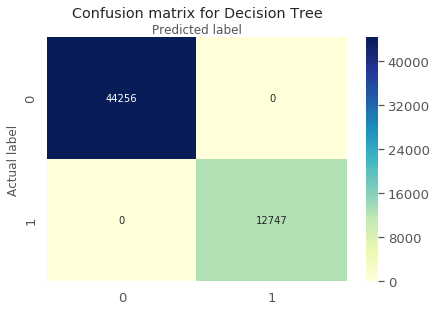

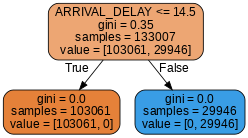

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
ARRIVAL_DELAY_15


Printing Scores for Random Forest Algorithm
Accuracy: 99.988
F1 score: 1.0
Recall: 0.999
Precision: 1.0
R2Score: 0.999
ROCScore: 1.0
MAE 0.0
MSE 0.0
RMSE 0.011

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44256
           1       1.00      1.00      1.00     12747

    accuracy                           1.00     57003
   macro avg       1.00      1.00      1.00     57003
weighted avg       1.00      1.00      1.00     57003


 confussion matrix:
 [[44256     0]
 [    7 12740]]



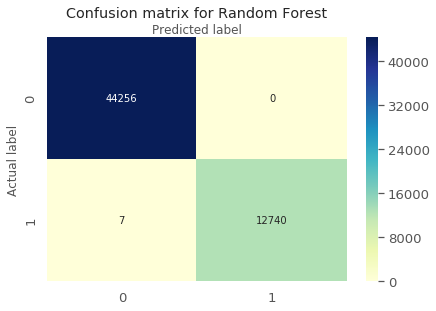

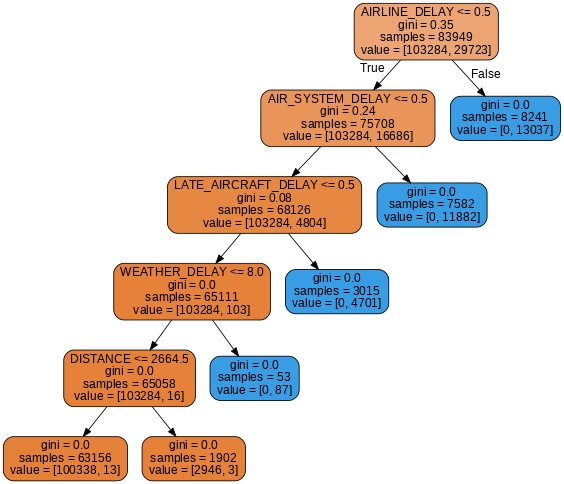

['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR']
ARRIVAL_DELAY_15


Printing Scores for KNN Algorithm
Accuracy: 91.843
F1 score: 0.785
Recall: 0.664
Precision: 0.958
R2Score: 0.53
ROCScore: 0.828
MAE 0.082
MSE 0.082
RMSE 0.286

 clasification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     44256
           1       0.96      0.66      0.78     12747

    accuracy                           0.92     57003
   macro avg       0.93      0.83      0.87     57003
weighted avg       0.92      0.92      0.91     57003


 confussion matrix:
 [[43884   372]
 [ 4278  8469]]



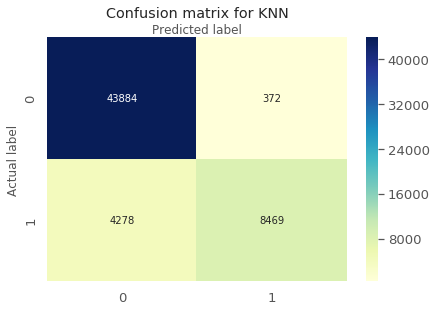




             algorithm  accuracy  precision  recall  fscore  r2score  \
0  Logistic Regression    99.982      1.000   1.000   1.000    0.999   
1          Naive Bayes    99.974      0.999   1.000   0.999    0.998   
2        Decision Tree   100.000      1.000   1.000   1.000    1.000   
3        Random Forest    99.988      1.000   0.999   1.000    0.999   
4                  KNN    91.843      0.958   0.664   0.785    0.530   

   rocscore    mae    mse   rmse  
0     1.000  0.000  0.000  0.013  
1     1.000  0.000  0.000  0.016  
2     1.000  0.000  0.000  0.000  
3     1.000  0.000  0.000  0.011  
4     0.828  0.082  0.082  0.286  


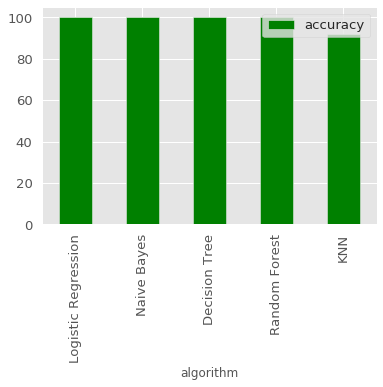

In [0]:
algorithms_performace = []
run_classification_algorithms(sfoorigindf ,allcols, 'ARRIVAL_DELAY_15', 'all')

In [0]:
arrival_performance_df = algorithms_performace_df.copy()
arrival_performance_df.head(10)

algorithm  accuracy  precision  recall  fscore  r2score  \
0  Logistic Regression    99.982      1.000   1.000   1.000    0.999   
1          Naive Bayes    99.974      0.999   1.000   0.999    0.998   
2        Decision Tree   100.000      1.000   1.000   1.000    1.000   
3        Random Forest    99.988      1.000   0.999   1.000    0.999   
4                  KNN    91.843      0.958   0.664   0.785    0.530   

   rocscore    mae    mse   rmse  
0     1.000  0.000  0.000  0.013  
1     1.000  0.000  0.000  0.016  
2     1.000  0.000  0.000  0.000  
3     1.000  0.000  0.000  0.011  
4     0.828  0.082  0.082  0.286

In [0]:
sfoobackup = sfoorigindf.copy()
sfodbackup = sfodestdf.copy()


In [0]:
print(sfoorigindf.columns)
allcols = list(sfoorigindf.columns)
allcols.remove('DEPARTURE_DELAY_15')
allcols.remove('ARRIVAL_DELAY_15')

Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
       'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED',
       'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',
       'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON', 'YEAR', 'DEPARTURE_DELAY_15',
       'ARRIVAL_DELAY_15'],
      dtype='object')


In [0]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            if column in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
                col = column + '_LABEL'
                result[col] = encoders[column].fit_transform(result[column])
            else:
                result[column] = result[column]
    return result, encoders
df_encoded, _ = number_encode_features(sfoorigindf)

sfoorigindec = df_encoded.copy()
allcols = list(sfoorigindec.describe().columns)
allcols.remove('DEPARTURE_DELAY_15')
allcols.remove('ARRIVAL_DELAY_15')
sfoorigindec.columns


Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
       'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLATION_REASON', 'CANCELLED',
       'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',
       'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON', 'YEAR', 'DEPARTURE_DELAY_15',
       'ARRIVAL_DELAY_15', 'AIRLINE_LABEL', 'DESTINATION_AIRPORT_LABEL',
       'ORIGIN_AIRPORT_LABEL'],
      dtype='object')

In [0]:
def airlinePrediction(DF, X_train_cols, y_train_col):
    clf = GaussianNB()
    X = DF[X_train_cols].iloc[ :, 0:]
    Y = DF[y_train_col]
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #calculate_scores(y_test, y_pred, classifier)
    print(len(y_pred))

airlinePrediction(sfoorigindec, allcols, 'ARRIVAL_DELAY_15')

57003


In [0]:
print(allcols)

bcols = allcols



['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME', 'DISTANCE', 'DIVERTED', 'ELAPSED_TIME', 'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SECURITY_DELAY', 'TAXI_IN', 'TAXI_OUT', 'WEATHER_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'YEAR', 'DESTINATION_AIRPORT_LABEL', 'ORIGIN_AIRPORT_LABEL']


In [0]:
allcols = bcols
allcols = ['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'CANCELLED', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DEPARTURE_TIME',  'MONTH', 'YEAR']

In [0]:
X_train_cols = allcols
#X_train_cols = [ 'DAY', 'DAY_OF_WEEK',  'MONTH', 'YEAR', 'ORIGIN_AIRPORT_LABEL', 'DESTINATION_AIRPORT_LABEL']
y_train_col = 'DEPARTURE_DELAY_15'

DF = sfoorigindec.copy()
DF.replace(np.nan, 0, inplace=True)
clf = GaussianNB()
X = DF[X_train_cols].iloc[ :, 0:]
Y = DF[y_train_col]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
clf.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:

cnt = 0
nocnt = 0

print('Label: Prediction Value, Probablility, DAY, DAY_OF_WEEK, MONTH, ORIGIN_AIRPORT_LABEL, DESTINATION_AIRPORT_LABEL, AIRLINE_LABEL')
print('Eg: Predicted Match from SFO on DAY 15 of Month for 10000 X_test set')
for i in range(1,10000):
  sfotestdf = X_test[i:i+1].copy()
  sfotestdf.reset_index(drop=True,inplace=True)

  y_pred = clf.predict(sfotestdf)
  predicedProb = clf.predict_proba(sfotestdf)
  sustr = str(sfotestdf['DAY'][0]) + " " + str(sfotestdf['DAY_OF_WEEK'][0])  + " " + \
  str(sfotestdf['MONTH'][0])   + " "+ str(sfotestdf['ORIGIN_AIRPORT_LABEL'][0])  + " " + str(sfotestdf['DESTINATION_AIRPORT_LABEL'][0])  \
  + " " + str(sfotestdf['AIRLINE_LABEL'][0])    

  if bool(y_pred) is True and sfotestdf['DAY'][0] == 15:
    if cnt < 5: print(bool(y_pred), predicedProb, sustr)
    cnt = cnt + 1
  else:
    #if nocnt < 5: print(bool(y_pred), predicedProb, sustr)
    nocnt = nocnt + 1

print('Total Number of matches for departure delay > 15 mins = ', cnt)
print('So for the True values, the particular set has predicted delay > 15 mins.')
print('Total Number of matches for departure delay < 15 mins = ', nocnt)



Label: Prediction Value, Probablility, DAY, DAY_OF_WEEK, MONTH, ORIGIN_AIRPORT_LABEL, DESTINATION_AIRPORT_LABEL, AIRLINE_LABEL
Eg: Predicted Match from SFO on DAY 15 of Month for 10000 X_test set
True [[1.19066381e-07 9.99999881e-01]] 15 2 5 0 71 1
True [[0. 1.]] 15 3 8 0 69 7
True [[0. 1.]] 15 4 11 0 19 7
True [[0. 1.]] 15 3 8 0 33 7
True [[5.37002407e-118 1.00000000e+000]] 15 7 7 0 36 3
Total Number of matches for departure delay > 15 mins =  87
So for the True values, the particular set has predicted delay > 15 mins.
Total Number of matches for departure delay < 15 mins =  9912
